# **TRAINING EXPECTED GOAL CLASSIC MODELS**


**Stu. Name**: Amirali Khatib, Amirali Bagherzadeh

**Stu. Id**: 4032315014, 4031315278

**Prof. Name**: Dr. Alireza Shadman

**IMPORT REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

**IMPORT DATA**

In [ ]:
# For Mr.Bagherzadeh
!gdown "https://drive.google.com/uc?id=1TimTRLpxa1NCFLsHWWypL8cVrNI6uPgN"

Downloading...
From: https://drive.google.com/uc?id=1TimTRLpxa1NCFLsHWWypL8cVrNI6uPgN
To: /content/SHOT_EVENT_FINAL.pkl
100% 9.96M/9.96M [00:00<00:00, 54.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shot_event = pd.read_pickle('/content/drive/MyDrive/SL-Project/DATASETS/XG/SHOT_EVENT_FINAL.pkl')
# For Mr.Bagherzadeh
# shot_event = pd.read_pickle('/content/SHOT_EVENT_FINAL.pkl')

In [ ]:
shot_event = shot_event.drop('shot_outcome',axis =1)

In [ ]:
shot_event.columns = ['play_pattern', 'under_pressure', 'follows_dribble', 'first_time',
                      'technique', 'body_part', 'open_goal', 'shot_type', 'deflected', 'xg',
                      'goal_distance', 'angle', 'teammates_in_triangle','opponents_in_triangle']

In [ ]:
shot_event.columns

Index(['play_pattern', 'under_pressure', 'follows_dribble', 'first_time',
       'technique', 'body_part', 'open_goal', 'shot_type', 'deflected', 'xg',
       'goal_distance', 'angle', 'teammates_in_triangle',
       'opponents_in_triangle'],
      dtype='object')

In [ ]:
shot_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87111 entries, 0 to 87110
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   play_pattern           87111 non-null  object 
 1   under_pressure         87111 non-null  bool   
 2   follows_dribble        87111 non-null  bool   
 3   first_time             87111 non-null  bool   
 4   technique              87111 non-null  object 
 5   body_part              87111 non-null  object 
 6   open_goal              87111 non-null  bool   
 7   shot_type              87111 non-null  object 
 8   deflected              87111 non-null  object 
 9   xg                     87111 non-null  float64
 10  goal_distance          87111 non-null  float64
 11  angle                  87104 non-null  float64
 12  teammates_in_triangle  87111 non-null  int64  
 13  opponents_in_triangle  87111 non-null  int64  
dtypes: bool(4), float64(3), int64(2), object(5)
memory usage: 7

In [ ]:
shot_event = shot_event.dropna()

In [ ]:
shot_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87104 entries, 0 to 87110
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   play_pattern           87104 non-null  object 
 1   under_pressure         87104 non-null  bool   
 2   follows_dribble        87104 non-null  bool   
 3   first_time             87104 non-null  bool   
 4   technique              87104 non-null  object 
 5   body_part              87104 non-null  object 
 6   open_goal              87104 non-null  bool   
 7   shot_type              87104 non-null  object 
 8   deflected              87104 non-null  object 
 9   xg                     87104 non-null  float64
 10  goal_distance          87104 non-null  float64
 11  angle                  87104 non-null  float64
 12  teammates_in_triangle  87104 non-null  int64  
 13  opponents_in_triangle  87104 non-null  int64  
dtypes: bool(4), float64(3), int64(2), object(5)
memory usage: 7

In [ ]:
shot_event.describe()

,xg,goal_distance,angle,teammates_in_triangle,opponents_in_triangle
count,87104.000000,87104.000000,87104.000000,87104.000000,87104.000000
mean,0.106283,19.203643,25.384712,0.184469,1.709967
std,0.149334,8.752120,15.787333,0.474968,1.053672
min,0.000180,0.400000,0.000000,0.000000,0.000000
25%,0.027679,12.015303,15.021798,0.000000,1.000000
50%,0.054791,18.450474,19.726571,0.000000,1.000000
75%,0.110058,25.526457,31.464010,0.000000,2.000000
max,0.995122,92.800862,180.000000,5.000000,11.000000


In [ ]:
shot_event = shot_event[shot_event['shot_type'] != 'Kick Off']

**Using Dummy Variable**

In [ ]:
shot_event.columns

Index(['play_pattern', 'under_pressure', 'follows_dribble', 'first_time',
       'technique', 'body_part', 'open_goal', 'shot_type', 'deflected', 'xg',
       'goal_distance', 'angle', 'teammates_in_triangle',
       'opponents_in_triangle'],
      dtype='object')

In [ ]:
dummies_shot_event = pd.get_dummies(shot_event, columns=['play_pattern', 'under_pressure', 'follows_dribble', 'first_time',
       'technique', 'body_part', 'open_goal', 'shot_type', 'deflected'], drop_first=True)
dummies_shot_event.head()

,xg,goal_distance,angle,teammates_in_triangle,opponents_in_triangle,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,...,technique_Overhead Kick,technique_Volley,body_part_Left Foot,body_part_Other,body_part_Right Foot,open_goal_True,shot_type_Free Kick,shot_type_Open Play,shot_type_Penalty,deflected_None
0,0.056644,20.203218,21.792845,2,2,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.143381,8.450444,37.941499,0,1,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2,0.038188,20.978084,14.591831,0,2,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True
3,0.052781,9.590099,32.715019,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,0.021272,30.901294,14.704957,0,3,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


#**ُSPLIT DATA AND NORMALIZATION**

In [ ]:
scaler = StandardScaler()
x = dummies_shot_event.drop('xg', axis=1)
y = dummies_shot_event['xg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=dummies_shot_event.columns[1:])
x_test_scaled = pd.DataFrame(x_test_scaled, columns=dummies_shot_event.columns[1:])

In [ ]:
print(f'Records of Train: {len(x_train)}')
print(f'Records of Test: {len(x_test)}')

Records of Train: 69682
Records of Test: 17421


# **FEATURE SELECTION**

## **FORWARD STEPWISE SELECTION**

**IMPORT REQUIRED MODULES**

In [ ]:
def ProcessSubset(X, Y, feature_set):
  # print(f'x shape: {X.shape} ; y shape: {Y.shape}')
  model = sm.OLS(Y, sm.add_constant(X[:,feature_set])).fit()
  RSS = ((model.predict(sm.add_constant(X[:,feature_set])) - Y) ** 2).sum()
  return {"model":model,
          "Feature_set": feature_set,
          "RSS":RSS,
          "BIC": model.bic,
          "AIC": model.aic,
          "R2adj": model.rsquared_adj}

In [ ]:
def forward (X, Y, current_features):
  remaining_features = list(set(range(X.shape[1])) - set(current_features))
  # print(f'remaining features: {remaining_features}')
  RSS_list = []
  Model_list = []
  for feature in remaining_features:
    feature_set = current_features + [feature]
    # print(f'feature set: {feature_set}')
    subset = ProcessSubset(X, Y, feature_set)
    Model_list.append(subset)
    RSS_list.append(subset['RSS'])
  return Model_list[np.argmin(RSS_list)]

In [ ]:
FORWARD_STEPWISE_SELECTION = []
current_features = []
x_train_scaled = np.array(x_train_scaled)
y_train = np.array(y_train)
for k in range(1, x_train_scaled.shape[1]+1):
  best_model = forward(x_train_scaled, y_train, current_features)
  FORWARD_STEPWISE_SELECTION.append(best_model)
  current_features = best_model['Feature_set']

In [ ]:
FORWARD_STEPWISE_SELECTION.append(ProcessSubset(x_train_scaled, y_train, []))

In [ ]:
FORWARD_STEPWISE_SELECTION = sorted(FORWARD_STEPWISE_SELECTION, key= lambda x: len(x['Feature_set']))

In [ ]:
FORWARD_STEPWISE_SELECTION = pd.DataFrame(FORWARD_STEPWISE_SELECTION)
FORWARD_STEPWISE_SELECTION['step'] = [f'step-{i+1}' for i in range(FORWARD_STEPWISE_SELECTION.shape[0])]

In [ ]:
FORWARD_STEPWISE_SELECTION[list(FORWARD_STEPWISE_SELECTION.columns)[1:]]

,Feature_set,RSS,BIC,AIC,R2adj,step
0,[],1552.558672,-67312.854191,-67322.005889,4.440892e-16,step-1
1,[1],955.766566,-101107.639088,-101125.942483,3.843838e-01,step-2
2,"[1, 27]",560.542984,-138279.344540,-138306.799632,6.389450e-01,step-3
3,"[1, 27, 24]",484.776765,-148387.233118,-148423.839907,6.877428e-01,step-4
4,"[1, 27, 24, 3]",443.752529,-154537.466100,-154583.224586,7.141635e-01,step-5
5,"[1, 27, 24, 3, 12]",426.296058,-157322.859635,-157377.769819,7.254038e-01,step-6
6,"[1, 27, 24, 3, 12, 14]",413.558434,-159425.529243,-159489.591124,7.336049e-01,step-7
7,"[1, 27, 24, 3, 12, 14, 25]",404.512633,-160955.454425,-161028.668004,7.394280e-01,step-8
8,"[1, 27, 24, 3, 12, 14, 25, 4]",396.121542,-162404.968329,-162487.333605,7.448296e-01,step-9
9,"[1, 27, 24, 3, 12, 14, 25, 4, 0]",389.979303,-163482.766442,-163574.283415,7.487826e-01,step-10


In [ ]:
current_features = []
for f_list in FORWARD_STEPWISE_SELECTION.Feature_set:
  # print(f_list)
  try:
    current_features.append(list(x_train.columns)[f_list[-1]])
    pass
  except:
    current_features.append('Intercept')
    pass
FORWARD_STEPWISE_SELECTION.Feature_set = current_features
FORWARD_STEPWISE_SELECTION

,model,Feature_set,RSS,BIC,AIC,R2adj,step
0,<statsmodels.regression.linear_model.Regressio...,Intercept,1552.558672,-67312.854191,-67322.005889,4.440892e-16,step-1
1,<statsmodels.regression.linear_model.Regressio...,angle,955.766566,-101107.639088,-101125.942483,3.843838e-01,step-2
2,<statsmodels.regression.linear_model.Regressio...,shot_type_Penalty,560.542984,-138279.344540,-138306.799632,6.389450e-01,step-3
3,<statsmodels.regression.linear_model.Regressio...,open_goal_True,484.776765,-148387.233118,-148423.839907,6.877428e-01,step-4
4,<statsmodels.regression.linear_model.Regressio...,opponents_in_triangle,443.752529,-154537.466100,-154583.224586,7.141635e-01,step-5
5,<statsmodels.regression.linear_model.Regressio...,under_pressure_True,426.296058,-157322.859635,-157377.769819,7.254038e-01,step-6
6,<statsmodels.regression.linear_model.Regressio...,first_time_True,413.558434,-159425.529243,-159489.591124,7.336049e-01,step-7
7,<statsmodels.regression.linear_model.Regressio...,shot_type_Free Kick,404.512633,-160955.454425,-161028.668004,7.394280e-01,step-8
8,<statsmodels.regression.linear_model.Regressio...,play_pattern_From Counter,396.121542,-162404.968329,-162487.333605,7.448296e-01,step-9
9,<statsmodels.regression.linear_model.Regressio...,goal_distance,389.979303,-163482.766442,-163574.283415,7.487826e-01,step-10


In [ ]:
FSS_FEATURES = list(FORWARD_STEPWISE_SELECTION.Feature_set.iloc[1:16])
FSS_FEATURES

['angle',
 'shot_type_Penalty',
 'open_goal_True',
 'opponents_in_triangle',
 'under_pressure_True',
 'first_time_True',
 'shot_type_Free Kick',
 'play_pattern_From Counter',
 'goal_distance',
 'body_part_Right Foot',
 'body_part_Left Foot',
 'technique_Normal',
 'technique_Lob',
 'technique_Diving Header',
 'technique_Half Volley']

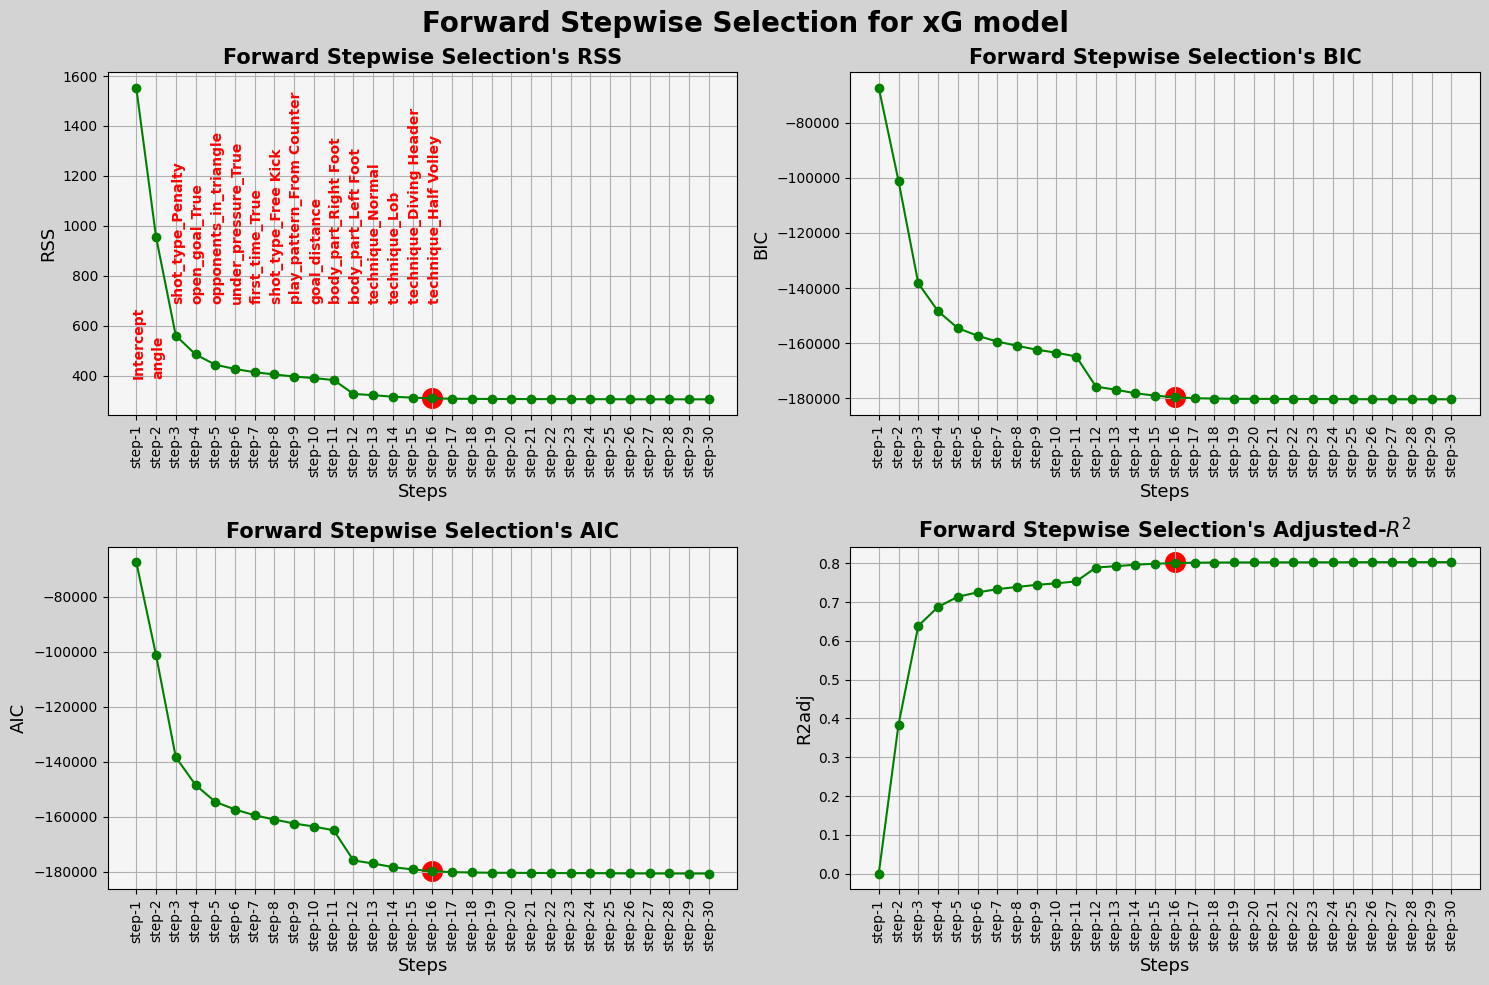

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (15,10))
fig.set_facecolor('lightgrey')
axs = axs.flatten()

fig.suptitle('Forward Stepwise Selection for xG model', weight = 'bold', fontsize = 20)
# FORWARD STEPWISE SELECTION
## RSS
axs[0].set_facecolor('whitesmoke')
axs[0].set_title("Forward Stepwise Selection's RSS", fontsize = 15, weight = 'semibold')
axs[0].set_xlabel('Steps', fontsize = 13)
axs[0].set_ylabel('RSS', fontsize = 13)
axs[0].set_xticks(list(range(len(FORWARD_STEPWISE_SELECTION))))
axs[0].set_xticklabels(FORWARD_STEPWISE_SELECTION.step, rotation=90)
axs[0].grid()
axs[0].plot(FORWARD_STEPWISE_SELECTION.step, FORWARD_STEPWISE_SELECTION.RSS, marker = 'o', color = 'green')
# axs[0].scatter(FORWARD_STEPWISE_SELECTION['step'],
#                FORWARD_STEPWISE_SELECTION['RSS'],
#                marker = 'o')
axs[0].scatter(15,
               FORWARD_STEPWISE_SELECTION.loc[15]['RSS'],
               marker = 'o', color = 'r', s = 200)

axs[0].text(x = -0.25, y = 400, s = FORWARD_STEPWISE_SELECTION['Feature_set'].iloc[0], rotation = 90, weight = 'semibold', color = 'red')
axs[0].text(x =  0.75, y = 400, s = FORWARD_STEPWISE_SELECTION['Feature_set'].iloc[1], rotation = 90, weight = 'semibold', color = 'red')
for i in range(2, 16):
  axs[0].text(x = -0.25+i, y = 700, s = FORWARD_STEPWISE_SELECTION['Feature_set'].iloc[i], rotation = 90, weight = 'semibold', color = 'red')

## BIC
axs[1].set_facecolor('whitesmoke')
axs[1].set_title("Forward Stepwise Selection's BIC", fontsize = 15, weight = 'semibold')
axs[1].set_xlabel('Steps', fontsize = 13)
axs[1].set_ylabel('BIC', fontsize = 13)
axs[1].set_xticks(list(range(len(FORWARD_STEPWISE_SELECTION))))
axs[1].set_xticklabels(FORWARD_STEPWISE_SELECTION.step, rotation=90)
axs[1].grid()
axs[1].plot(FORWARD_STEPWISE_SELECTION.step, FORWARD_STEPWISE_SELECTION.BIC, marker = 'o', color = 'green')
# axs[1].scatter(FORWARD_STEPWISE_SELECTION['step'],
#                FORWARD_STEPWISE_SELECTION['BIC'],
#                marker = 'o')
axs[1].scatter(15, FORWARD_STEPWISE_SELECTION.loc[15]['BIC'],
               marker = 'o', color = 'r', s = 200)

## AIC
axs[2].set_facecolor('whitesmoke')
axs[2].set_title("Forward Stepwise Selection's AIC", fontsize = 15, weight = 'semibold')
axs[2].set_xlabel('Steps', fontsize = 13)
axs[2].set_ylabel('AIC', fontsize = 13)
axs[2].set_xticks(list(range(len(FORWARD_STEPWISE_SELECTION))))
axs[2].set_xticklabels(FORWARD_STEPWISE_SELECTION.step, rotation=90)
axs[2].grid()
axs[2].plot(FORWARD_STEPWISE_SELECTION.step, FORWARD_STEPWISE_SELECTION.AIC, marker = 'o', color = 'green')
# axs[2].scatter(FORWARD_STEPWISE_SELECTION['step'],
#                FORWARD_STEPWISE_SELECTION['AIC'],
#                marker = 'o')
axs[2].scatter(15, FORWARD_STEPWISE_SELECTION.loc[15]['AIC'],
               marker = 'o', color = 'r', s = 200)

## R2adj
axs[3].set_facecolor('whitesmoke')
axs[3].set_title("Forward Stepwise Selection's Adjusted-$R^2$", fontsize = 15, weight = 'semibold')
axs[3].set_xlabel('Steps', fontsize = 13)
axs[3].set_ylabel('R2adj', fontsize = 13)
axs[3].set_xticks(list(range(len(FORWARD_STEPWISE_SELECTION))))
axs[3].set_xticklabels(FORWARD_STEPWISE_SELECTION.step, rotation=90)
axs[3].grid()
axs[3].plot(FORWARD_STEPWISE_SELECTION.step, FORWARD_STEPWISE_SELECTION.R2adj, marker = 'o', color = 'green')
# axs[3].scatter(FORWARD_STEPWISE_SELECTION['step'],
#                FORWARD_STEPWISE_SELECTION['R2adj'],
#                marker = 'o')
axs[3].scatter(15, FORWARD_STEPWISE_SELECTION.loc[np.argmax(FORWARD_STEPWISE_SELECTION.R2adj)]['R2adj'],
               marker = 'o', color = 'r', s = 200)
plt.tight_layout()
plt.show()

In [ ]:
selected_features = [1, 27, 24, 3, 12, 14, 25, 4, 0, 23, 21, 18, 17, 15, 16]

x_train_selected = x_train.iloc[:, selected_features]
x_test_selected = x_test.iloc[:, selected_features]
x_train_selected.columns

Index(['angle', 'shot_type_Penalty', 'open_goal_True', 'opponents_in_triangle',
       'under_pressure_True', 'first_time_True', 'shot_type_Free Kick',
       'play_pattern_From Counter', 'goal_distance', 'body_part_Right Foot',
       'body_part_Left Foot', 'technique_Normal', 'technique_Lob',
       'technique_Diving Header', 'technique_Half Volley'],
      dtype='object')

In [ ]:
x_train_selected.head()

,angle,shot_type_Penalty,open_goal_True,opponents_in_triangle,under_pressure_True,first_time_True,shot_type_Free Kick,play_pattern_From Counter,goal_distance,body_part_Right Foot,body_part_Left Foot,technique_Normal,technique_Lob,technique_Diving Header,technique_Half Volley
9083,49.887811,False,False,1,True,False,False,False,8.600000,False,False,True,False,False,False
30986,15.893373,False,False,1,False,False,False,False,18.491079,False,True,True,False,False,False
10802,8.267733,False,False,1,False,False,False,False,24.821362,True,False,True,False,False,False
20156,16.426216,False,False,2,False,False,False,False,27.262428,True,False,True,False,False,False
80232,12.192018,False,False,1,False,False,False,False,18.388312,True,False,True,False,False,False


In [ ]:
FS = ['selected features', 'All features']

## **PRINCIPAL COMPONENT ANALYSIS**

**IMPORT REQUIRED MODULES**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pca = PCA()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca.fit(x_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
len(cumsum)

29

In [ ]:
cumsum

array([0.1040611 , 0.18928744, 0.26431816, 0.32893108, 0.384524  ,
       0.43038202, 0.47060523, 0.51004994, 0.5473523 , 0.58365681,
       0.61924116, 0.65450639, 0.68936239, 0.72414654, 0.75859762,
       0.79300687, 0.8267432 , 0.85992071, 0.89157185, 0.91749615,
       0.94225169, 0.96340186, 0.98007655, 0.98743659, 0.99364689,
       0.99745214, 0.9995526 , 0.99990933, 1.        ])

In [ ]:
cumsum[21]

0.963401859114007

In [ ]:
29 - len(cumsum[cumsum > 0.95])

21

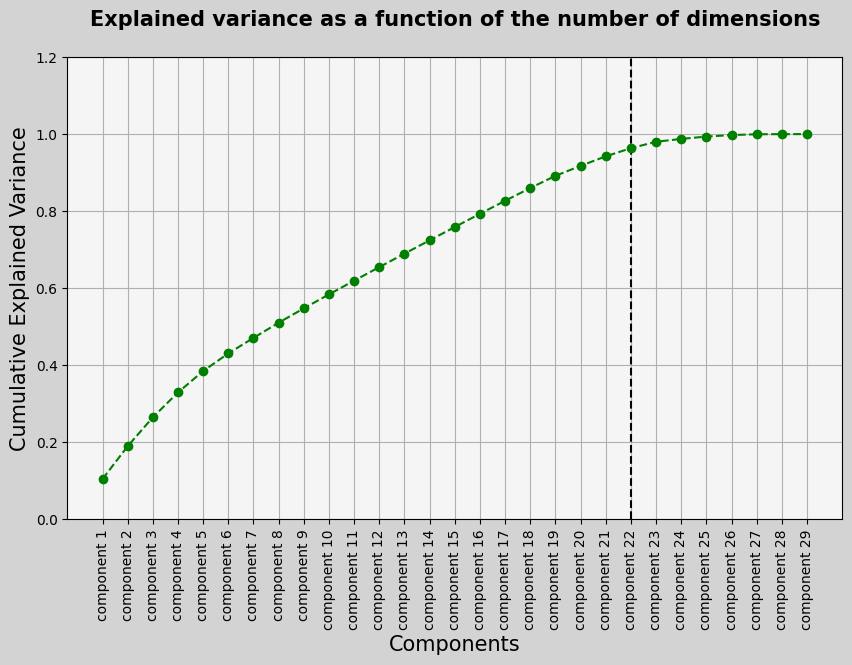

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
fig.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')

# Explained variance
ax.axvline(x = 21, ls = '--', color = 'black')
ax.plot([f'component {c}' for c in range(1, 30)],
        cumsum, marker = 'o', ls = '--',
        color = 'green')
ax.set_title('Explained variance as a function of the number of dimensions\n', fontsize = 15, weight = 'bold')
ax.set_xlabel('Components', fontsize = 15)
ax.set_ylabel('Cumulative Explained Variance', fontsize = 15)
# ax.set_ylim(0.992,1.02)
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], fontsize = 10, rotation = 90)
ax.set_yticklabels([label.get_text() for label in ax.get_yticklabels()], fontsize = 10)
ax.grid()

plt.show()

In [ ]:
pca = PCA(n_components = 0.95)
x_red = pd.DataFrame(data = pca.fit_transform(x_scaled),
                     columns = [f'Component_{i}' for i in range(1,23)])

In [ ]:
x_train_red, x_test_red, y_train, y_test = train_test_split(x_red, y, test_size = 0.2, random_state = 42)

In [ ]:
def KFOLD_PCR(x_train, y_train, poly_degree, interaction_only):
  # 10 FOLD
  kfold = KFold(n_splits = 10,shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train,y_train))
  # List
  duration_list = []
  mse_list = []
  r2_list = []
  # Main
  fold = 0
  for est_idx, val_idx in k_fold_data:
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Polynomial transformation
    poly = PolynomialFeatures(degree = poly_degree, interaction_only = interaction_only, include_bias=True)
    x_est = poly.fit_transform(x_est)
    x_val = poly.transform(x_val)
    # Train Linear Regression
    linreg = LinearRegression(fit_intercept=False)
    start = time.time()
    linreg = linreg.fit(x_est, y_est)
    end = time.time()
    mse = mean_squared_error(y_true = y_val,
                              y_pred = linreg.predict(x_val))
    r2 = r2_score(y_true = y_val,
                              y_pred = linreg.predict(x_val))
    r2_list = []
    duration_list.append(end - start)
    mse_list.append(mse)
    r2_list.append(r2)
    fold += 1
    # print(f'FOLD {fold}: {mse}')
  return np.mean(mse_list), np.mean(duration_list), np.mean(r2_list)

In [ ]:
POLY_DEGREE = [1, 2, 2, 3]
INTERACTION_ONLY = [True, True, False, True]
Report_PCR = {}
Report_PCR['degree'], Report_PCR['interaction'], Report_PCR['mse'], Report_PCR['r2'], Report_PCR['duration'] = [], [], [], [],[]

for degree, interaction in zip(POLY_DEGREE, INTERACTION_ONLY):
  print(f'>>>>>>>>>>>>>>>>> degree = {degree}, interaction = {interaction} <<<<<<<<<<<<<<<<<<<<')
  mse, dur, r2 = KFOLD_PCR(x_train = x_train_red, y_train = y_train, poly_degree = degree, interaction_only = interaction)
  Report_PCR['degree'].append(degree)
  Report_PCR['interaction'].append(interaction)
  Report_PCR['mse'].append(mse)
  Report_PCR['r2'].append(r2)
  Report_PCR['duration'].append(dur)

>>>>>>>>>>>>>>>>> degree = 1, interaction = True <<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>> degree = 2, interaction = True <<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>> degree = 2, interaction = False <<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>> degree = 3, interaction = True <<<<<<<<<<<<<<<<<<<<


In [ ]:
Report_PCR_df = pd.DataFrame(Report_PCR)
Report_PCR_df

,degree,interaction,mse,r2,duration
0,1,True,5.954946e-03,7.255569e-01,0.085493
1,2,True,7.467944e-02,-8.007811e+00,2.366259
2,2,False,3.922984e+03,-1.277871e+03,2.015818
3,3,True,1.127097e+08,-1.699465e+08,34.150980


## **PARTIAL LEAST SQUARES**

**IMPORT REQUIRED MODULES**

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
def KFOLD_PLS(x_train, y_train, n_components):
  # 10 FOLD
  kfold = KFold(n_splits = 10,shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train,y_train))
  # List
  duration_list = []
  mse_list = []
  r2_list = []
  # Main
  fold = 0
  for est_idx, val_idx in k_fold_data:
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Standard scaling
    scaler = StandardScaler()
    x_est = scaler.fit_transform(x_est)
    x_val = scaler.transform(x_val)
    # Train Partial Least Squares
    pls =  PLSRegression(n_components = n_components)
    start = time.time()
    pls = pls.fit(x_est, y_est)
    mse = mean_squared_error(y_true = y_val,
                              y_pred = pls.predict(x_val))
    end = time.time()
    duration_list.append(end - start)
    mse_list.append(mse)
    # r2_list.append()
    fold += 1
    # print(f'FOLD {fold}: {mse}')
  return np.mean(mse_list), np.mean(duration_list)

In [ ]:
Report_PLS = {'n_components':[], 'mse':[], 'duration':[]}
for n in range(1, 30):
  Report_PLS['n_components'].append(n)
  PLS_output = KFOLD_PLS(x_train, y_train, n)
  Report_PLS['mse'].append(PLS_output[0])
  Report_PLS['duration'].append(PLS_output[1])

In [ ]:
Report_PLS_df = pd.DataFrame(Report_PLS)
Report_PLS_df

,n_components,mse,duration
0,1,0.006502,0.066006
1,2,0.005588,0.095704
2,3,0.005182,0.090163
3,4,0.004798,0.102574
4,5,0.004538,0.121731
5,6,0.004457,0.146584
6,7,0.004433,0.201683
7,8,0.004419,0.295999
8,9,0.004406,0.206531
9,10,0.004400,0.225952


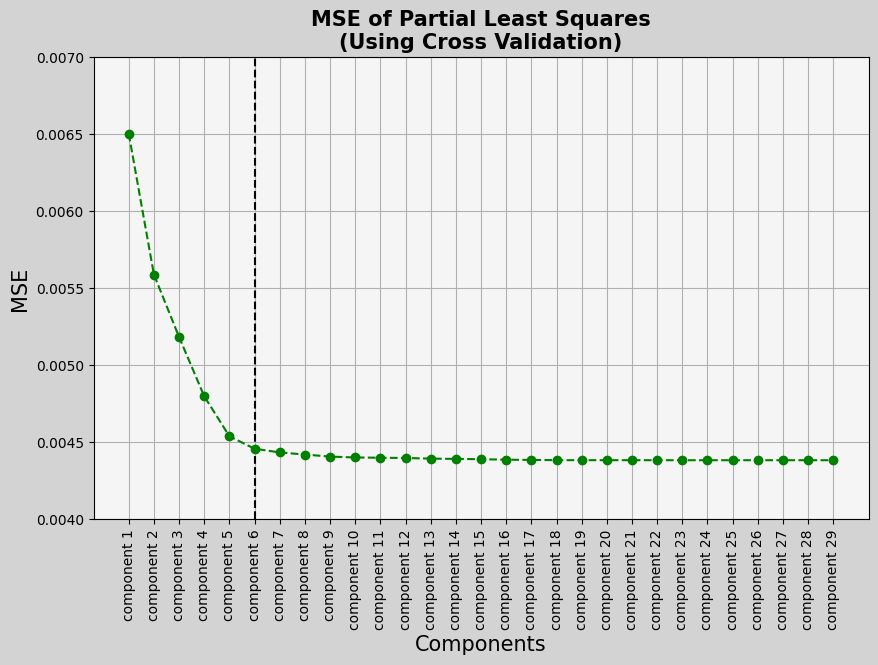

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
fig.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')

# Explained variance
ax.axvline(x = 5, ls = '--', color = 'black')
ax.plot([f'component {c}' for c in range(1, 30)],
        Report_PLS_df.mse, marker = 'o', ls = '--',
        color = 'green')
ax.set_title('MSE of Partial Least Squares\n(Using Cross Validation)', fontsize = 15, weight = 'bold')
ax.set_xlabel('Components', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
# ax.set_ylim(0.992,1.02)
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], fontsize = 10, rotation = 90)
ax.set_yticklabels([label.get_text() for label in ax.get_yticklabels()], fontsize = 10)
ax.grid()
plt.show()

# **REGRESSION MODELS**

In [ ]:
import time

## **K-NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def KNN_KFOLD(x_train, y_train, k):
  # 10 FOLD
  kfold = KFold(n_splits = 10,shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train,y_train))
  # List
  duration_list = []
  mse_list = []
  r2_list = []
  # Main
  fold = 0
  for est_idx, val_idx in k_fold_data:
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Standard scaling
    scaler = StandardScaler()
    x_est = scaler.fit_transform(x_est)
    x_val = scaler.transform(x_val)
    # Train Logistic Regression
    knn = KNeighborsRegressor(n_neighbors = k)
    start = time.time()
    knn = knn.fit(x_est, y_est)
    end = time.time()
    mse = mean_squared_error(y_true = y_val,
                              y_pred = knn.predict(x_val))
    r2 = r2_score(y_true = y_val,
                              y_pred = knn.predict(x_val))
    duration_list.append(end - start)
    mse_list.append(mse)
    r2_list.append(r2)
    fold += 1
    print(f'FOLD {fold}: {mse}')
  return np.mean(mse_list), np.mean(r2_list),np.mean(duration_list)

In [ ]:
knn_report = {}
knn_report['k'], knn_report['mse'], knn_report['r2'], knn_report['duration'] = [], [], [], []

for k in np.arange(1, 41, 1):
  print(f'>>>>>>>>>>>>>>>>>>>>>>>>>>> k = {k} <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
  mse, r2, dur = KNN_KFOLD(x_train = x_train,y_train = y_train, k = k)
  knn_report['k'].append(k)
  knn_report['mse'].append(mse)
  knn_report['r2'].append(r2)
  knn_report['duration'].append(dur)

>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.005519047667487648
FOLD 2: 0.004916601441862275
FOLD 3: 0.005067658330897178
FOLD 4: 0.004884855835123418
FOLD 5: 0.004781595690646932
FOLD 6: 0.004707420260989729
FOLD 7: 0.005534310964669555
FOLD 8: 0.005112815429947503
FOLD 9: 0.004669917217802331
FOLD 10: 0.005564235566335404
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.003959647794485945
FOLD 2: 0.0038282910201819773
FOLD 3: 0.0039909421851238355
FOLD 4: 0.0037773660733053816
FOLD 5: 0.003807242253471207
FOLD 6: 0.003710386329138394
FOLD 7: 0.004436477856685049
FOLD 8: 0.003692353283092367
FOLD 9: 0.003680120711496716
FOLD 10: 0.004011527587327575
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 3 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0036129714020962655
FOLD 2: 0.0035528423420526332
FOLD 3: 0.0035868719882199977
FOLD 4: 0.003422581924270473
FOLD 5: 0.0034753950479712134
FOLD 6: 0.0033955462951444706
FOLD 7: 0.003992685446256609
FOLD 8: 0.00

In [ ]:
knn_report = pd.DataFrame(knn_report)
knn_report

,k,mse,duration
0,1,0.005076,3.032895
1,2,0.003889,2.998727
2,3,0.003526,2.991086
3,4,0.003336,2.999112
4,5,0.003255,3.088987
5,6,0.003211,3.116919
6,7,0.003189,3.159927
7,8,0.003176,3.008208
8,9,0.003168,3.013870
9,10,0.003173,2.987361


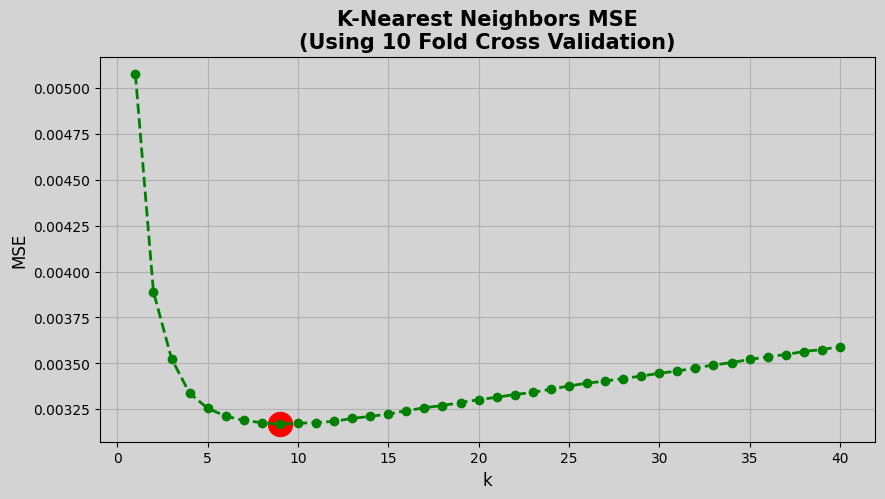

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('K-Nearest Neighbors MSE\n(Using 10 Fold Cross Validation)',fontsize = 15, weight = 'bold')
ax.set_xlabel('k', fontsize = 12)
ax.set_ylabel('MSE', fontsize = 12)
ax.set_facecolor('lightgrey')
fig.set_facecolor('lightgrey')
ax.grid()
ax.plot(knn_report['k'], knn_report['mse'], color = 'green', linewidth = 2, linestyle = '--', marker = 'o')
ax.scatter(x = knn_report[knn_report.mse == np.min(knn_report.mse)].iloc[0, 0],
           y = knn_report[knn_report.mse == np.min(knn_report.mse)].iloc[0, 1],
           color = 'red', marker = 'o', s = 300)
plt.show()

In [ ]:
np.min(knn_report.mse)

0.0031675940637158314

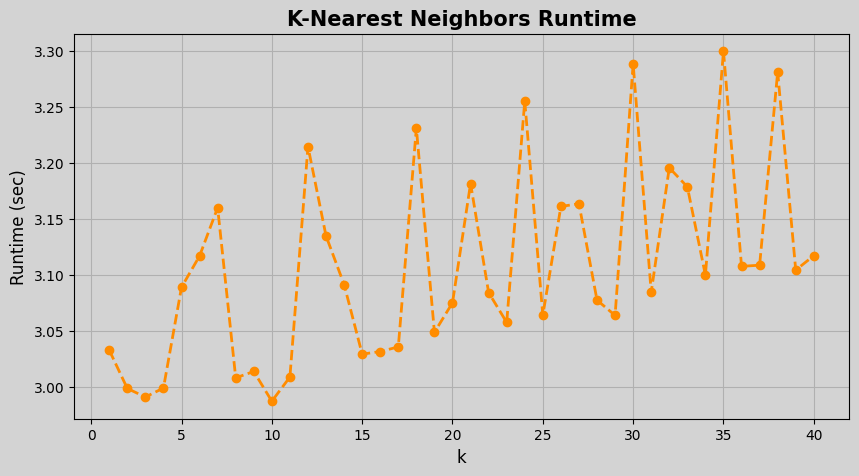

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('K-Nearest Neighbors Runtime',fontsize = 15, weight = 'bold')
ax.set_xlabel('k', fontsize = 12)
ax.set_ylabel('Runtime (sec)', fontsize = 12)
ax.set_facecolor('lightgrey')
fig.set_facecolor('lightgrey')
ax.grid()
ax.plot(knn_report['k'], knn_report['duration'], color = 'darkorange', linewidth = 2, linestyle = '--', marker = 'o')
plt.show()

### **WITH FEATURE SELECETION**

In [ ]:
def KNN_KFOLD_FS(x_train, y_train, k):
  kfold = KFold(n_splits = 5,shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train,y_train))
  # List
  duration_list = []
  mse_list = []
  r2_list = []
  # Main
  fold = 0
  iter = 0
  for est_idx, val_idx in k_fold_data:
    iter += 1
    if iter > 2:
      break
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Standard scaling
    scaler = StandardScaler()
    x_est = scaler.fit_transform(x_est)
    x_val = scaler.transform(x_val)
    # Train Logistic Regression
    knn = KNeighborsRegressor(n_neighbors = k)
    start = time.time()
    knn = knn.fit(x_est, y_est)
    end = time.time()
    mse = mean_squared_error(y_true = y_val,
                              y_pred = knn.predict(x_val))
    r2 = r2_score(y_true = y_val,
                              y_pred = knn.predict(x_val))
    duration_list.append(end - start)
    mse_list.append(mse)
    r2_list.append(r2)
    fold += 1
    print(f'FOLD {fold}: {mse}')
  return np.mean(mse_list), np.mean(r2_list),np.mean(duration_list)

In [ ]:
knn_report_fs = {}
knn_report_fs['Selection'], knn_report_fs['k'], knn_report_fs['mse'], knn_report_fs['r2'], knn_report_fs['duration'] = [], [], [], [], []
FS = ['selected features', 'All features']
for fs in FS:
  print(f'---------------------------------- Selection: {fs} ----------------------------------')
  if fs == 'selected features':
    x_train__ = x_train_selected
  elif fs == 'All features':
    x_train__ = x_train
  for k in np.arange(1, 26, 1):
    print(f'>>>>>>>>>>>>>>>>>>>>>>>>>>> k = {k} <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    mse, r2, dur = KNN_KFOLD_FS(x_train = x_train__,y_train = y_train, k = k)
    knn_report_fs['Selection'].append(fs)
    knn_report_fs['k'].append(k)
    knn_report_fs['mse'].append(mse)
    knn_report_fs['r2'].append(r2)
    knn_report_fs['duration'].append(dur)

---------------------------------- Selection: selected features ----------------------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0048413598363268116
FOLD 2: 0.004861916718824592
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0037072187708459578
FOLD 2: 0.003623618690766888
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 3 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0033091044660702226
FOLD 2: 0.00325929096785412
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 4 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.00313921562871887
FOLD 2: 0.0030843832953241952
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 5 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.003036973647785745
FOLD 2: 0.0030019946717098718
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 6 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.002961775292502538
FOLD 2: 0.002935239427950607
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 7 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0029332695302395476
FOLD 2: 0.0028977056208134414
>>>>>>>>>>>>>>>>>>>>>>>>>>> k = 8 <

In [ ]:
knn_report_fs = pd.DataFrame(knn_report_fs)
print('Best K for Selected Features:')
knn_report_fs[
    (knn_report_fs['Selection'] == 'selected features') &
    (knn_report_fs['mse'] == knn_report_fs.loc[knn_report_fs['Selection'] == 'selected features', 'mse'].min())
]

Best K for Selected Features:


,Selection,k,mse,r2,duration
17,selected features,18,0.002822,0.872855,0.181117


In [ ]:
print('Best K for ALL Features:')
knn_report_fs[
    (knn_report_fs['Selection'] == 'All features') &
    (knn_report_fs['mse'] == knn_report_fs.loc[knn_report_fs['Selection'] == 'All features', 'mse'].min())
]

Best K for ALL Features:


,Selection,k,mse,r2,duration
32,All features,8,0.003203,0.855665,0.012662


In [ ]:
knn_report_fs.to_csv('/content/drive/MyDrive/knn_reg_report_fs.csv')

## **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**LINEAR REGRESSION K-FOLD CROSS VALIDATION**

In [ ]:
def LINREG_KFOLD(x_train, y_train, poly_degree, interaction_only):
  # 10 FOLD
  kfold = KFold(n_splits = 10,shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train,y_train))
  # List
  duration_list = []
  mse_list = []
  # Main
  fold = 0
  for est_idx, val_idx in k_fold_data:
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Standard scaling
    scaler = StandardScaler()
    x_est = scaler.fit_transform(x_est)
    x_val = scaler.transform(x_val)
    # Polynomial transformation
    poly = PolynomialFeatures(degree = poly_degree, interaction_only = interaction_only, include_bias=True)
    x_est = poly.fit_transform(x_est)
    x_val = poly.transform(x_val)
    # Train Linear Regression
    linreg = LinearRegression(fit_intercept=False)
    start = time.time()
    linreg = linreg.fit(x_est, y_est)
    end = time.time()
    mse = mean_squared_error(y_true = y_val,
                              y_pred = linreg.predict(x_val))

    duration_list.append(end - start)
    mse_list.append(mse)
    fold += 1
    print(f'FOLD {fold}: {mse}')
  return np.mean(mse_list), np.mean(duration_list)

In [ ]:
POLY_DEGREE = [1, 2, 2, 3]
INTERACTION_ONLY = [True, True, False, True]
linreg_report = {}
linreg_report['degree'], linreg_report['interaction'], linreg_report['mse'], linreg_report['duration'] = [], [], [], []
for degree, interaction in zip(POLY_DEGREE, INTERACTION_ONLY):
  print(f'>>>>>>>>>>>>>>>>> degree = {degree}, interaction = {interaction} <<<<<<<<<<<<<<<<<<<<')
  mse, dur = LINREG_KFOLD(x_train = x_train,y_train = y_train, poly_degree = degree, interaction_only = interaction)
  linreg_report['degree'].append(degree)
  linreg_report['interaction'].append(interaction)
  linreg_report['mse'].append(mse)
  linreg_report['duration'].append(dur)

>>>>>>>>>>>>>>>>> degree = 1, interaction = True <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0042869671524554155
FOLD 2: 0.004126153963840112
FOLD 3: 0.004241920487596107
FOLD 4: 0.0043312833820906334
FOLD 5: 0.00460472610215158
FOLD 6: 0.0044178490273984895
FOLD 7: 0.004801307649203519
FOLD 8: 0.004376158146555524
FOLD 9: 0.004191900454473048
FOLD 10: 0.0044456881526030246
>>>>>>>>>>>>>>>>> degree = 2, interaction = True <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.003312487577187813
FOLD 2: 0.003363515441279936
FOLD 3: 0.0033176141300017086
FOLD 4: 0.0032535552036082787
FOLD 5: 0.003456258560339523
FOLD 6: 0.0034728834561908064
FOLD 7: 0.003499464974805537
FOLD 8: 0.0031982510467233613
FOLD 9: 0.0031646400880823134
FOLD 10: 0.0032620695446613107
>>>>>>>>>>>>>>>>> degree = 2, interaction = False <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0030777183847795317
FOLD 2: 0.0031287885009966413
FOLD 3: 0.0030988662017892004
FOLD 4: 0.0030214939012299666
FOLD 5: 0.003257864578572734
FOLD 6: 0.003254241853288171
FOLD 7: 0.0033049221

In [ ]:
linreg_report = pd.DataFrame(linreg_report)
linreg_report

,degree,interaction,mse,duration
0,1,True,0.004382,0.236197
1,2,True,0.003330,4.153170
2,2,False,0.003139,4.534679
3,3,True,0.003683,185.861006


In [ ]:
x_test_scaled

,goal_distance,angle,teammates in triangle,opponents in triangle,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,...,technique_Overhead Kick,technique_Volley,body_part_Left Foot,body_part_Other,body_part_Right Foot,open_goal_True,shot_type_Free Kick,shot_type_Open Play,shot_type_Penalty,deflected_None
0,1.091216,-0.821994,-0.38741,-0.673825,-0.218601,1.972909,-0.198088,-0.126353,-0.107291,-0.463485,...,-0.072265,-0.261937,-0.677160,-0.055111,0.953301,-0.105358,-0.224342,0.259709,-0.12321,0.114067
1,1.711554,-0.775259,-0.38741,1.227279,-0.218601,1.972909,-0.198088,-0.126353,-0.107291,-0.463485,...,-0.072265,-0.261937,-0.677160,-0.055111,0.953301,-0.105358,-0.224342,0.259709,-0.12321,0.114067
2,-1.189792,-0.090230,-0.38741,-1.624377,-0.218601,-0.506866,-0.198088,-0.126353,-0.107291,-0.463485,...,-0.072265,-0.261937,-0.677160,-0.055111,-1.048987,-0.105358,-0.224342,0.259709,-0.12321,0.114067
3,0.377380,-0.407038,-0.38741,0.276727,-0.218601,1.972909,-0.198088,-0.126353,-0.107291,-0.463485,...,13.838053,-0.261937,1.476757,-0.055111,-1.048987,-0.105358,-0.224342,0.259709,-0.12321,0.114067
4,-0.563397,0.358279,-0.38741,1.227279,-0.218601,-0.506866,-0.198088,7.914324,-0.107291,-0.463485,...,-0.072265,-0.261937,-0.677160,-0.055111,0.953301,-0.105358,-0.224342,0.259709,-0.12321,0.114067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17416,1.259926,-0.653497,-0.38741,-0.673825,-0.218601,1.972909,-0.198088,-0.126353,-0.107291,-0.463485,...,-0.072265,-0.261937,-0.677160,-0.055111,0.953301,-0.105358,-0.224342,0.259709,-0.12321,0.114067
17417,0.545620,-0.413033,-0.38741,0.276727,-0.218601,-0.506866,-0.198088,-0.126353,-0.107291,2.157565,...,-0.072265,-0.261937,-0.677160,-0.055111,0.953301,-0.105358,-0.224342,0.259709,-0.12321,0.114067
17418,-1.151423,1.384384,-0.38741,0.276727,-0.218601,-0.506866,-0.198088,-0.126353,-0.107291,-0.463485,...,-0.072265,-0.261937,-0.677160,-0.055111,0.953301,-0.105358,-0.224342,0.259709,-0.12321,0.114067
17419,0.227096,-1.184595,-0.38741,-0.673825,-0.218601,1.972909,-0.198088,-0.126353,-0.107291,-0.463485,...,-0.072265,-0.261937,-0.677160,-0.055111,0.953301,-0.105358,-0.224342,0.259709,-0.12321,0.114067


#### **WITH FEATURE SELECTION**

In [ ]:
def LINREG_KFOLD_FS(x_train, y_train, poly_degree, interaction_only):
  # 10 FOLD
  kfold = KFold(n_splits = 5,shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train,y_train))
  # List
  duration_list = []
  mse_list = []
  r2_list = []
  # Main
  fold = 0
  for est_idx, val_idx in k_fold_data:
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Standard scaling
    scaler = StandardScaler()
    x_est = scaler.fit_transform(x_est)
    x_val = scaler.transform(x_val)
    # Polynomial transformation
    poly = PolynomialFeatures(degree = poly_degree, interaction_only = interaction_only, include_bias=True)
    x_est = poly.fit_transform(x_est)
    x_val = poly.transform(x_val)
    # Train Linear Regression
    linreg = LinearRegression(fit_intercept=False)
    start = time.time()
    linreg = linreg.fit(x_est, y_est)
    end = time.time()
    mse = mean_squared_error(y_true = y_val,
                              y_pred = linreg.predict(x_val))
    r2 = r2_score(y_true = y_val,
                              y_pred = linreg.predict(x_val))
    duration_list.append(end - start)
    mse_list.append(mse)
    r2_list.append(r2)
    fold += 1
    print(f'FOLD {fold}: {mse}')
  return np.mean(mse_list), np.mean(r2_list),np.mean(duration_list)

In [ ]:
POLY_DEGREE = [1, 2, 2, 3]
INTERACTION_ONLY = [True, True, False, True]
linreg_report_fs = {}
linreg_report_fs['Selection'] ,linreg_report_fs['degree'], linreg_report_fs['interaction'], linreg_report_fs['mse'], linreg_report_fs['r2'], linreg_report_fs['duration'] = [], [], [], [], [], []
FS = ['selected features', 'All features']

for fs in FS:
  print(f'---------------------------------- Selection: {fs} ----------------------------------')
  if fs == 'selected features':
    x_train__ = x_train_selected
  elif fs == 'All features':
    x_train__ = x_train

  for degree, interaction in zip(POLY_DEGREE, INTERACTION_ONLY):
    print(f'>>>>>>>>>>>>>>>>> degree = {degree}, interaction = {interaction} <<<<<<<<<<<<<<<<<<<<')
    mse, r2, dur = LINREG_KFOLD_FS(x_train = x_train__, y_train = y_train, poly_degree = degree, interaction_only = interaction)
    linreg_report_fs['Selection'].append(fs)
    linreg_report_fs['degree'].append(degree)
    linreg_report_fs['interaction'].append(interaction)
    linreg_report_fs['mse'].append(mse)
    linreg_report_fs['r2'].append(r2)
    linreg_report_fs['duration'].append(dur)

---------------------------------- Selection: selected_features ----------------------------------
>>>>>>>>>>>>>>>>> degree = 1, interaction = True <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004271043731807957
FOLD 2: 0.004337617855250917
FOLD 3: 0.004569175328111269
FOLD 4: 0.0046395253644887224
FOLD 5: 0.0043623259323094
>>>>>>>>>>>>>>>>> degree = 2, interaction = True <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0034511156279644017
FOLD 2: 0.0033906265369466476
FOLD 3: 0.0036013915463965814
FOLD 4: 0.003457752217394073
FOLD 5: 0.0033340226903257443
>>>>>>>>>>>>>>>>> degree = 2, interaction = False <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.003161668820607899
FOLD 2: 0.003090117410937084
FOLD 3: 0.0033170332948110966
FOLD 4: 0.0032006677590857226
FOLD 5: 0.003175224389402961
>>>>>>>>>>>>>>>>> degree = 3, interaction = True <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0034557902863951006
FOLD 2: 0.0031317933051966972
FOLD 3: 0.003398170237220134
FOLD 4: 0.003249297538060132
FOLD 5: 0.0031555983051429733
--------------------------------

In [ ]:
linreg_report_fs = pd.DataFrame(linreg_report_fs)
linreg_report_fs

,Selection,degree,interaction,mse,r2,duration
0,selected_features,1,True,0.004436,0.800890,0.075876
1,selected_features,2,True,0.003447,0.845282,2.353793
2,selected_features,2,False,0.003189,0.856831,0.780810
3,selected_features,3,True,0.003278,0.852829,5.552163
4,All_features,1,True,0.004384,0.803234,0.054253
5,All_features,2,True,0.003339,0.850119,3.152238
6,All_features,2,False,0.003147,0.858724,5.305970
7,All_features,3,True,0.003590,0.838767,151.458640


In [ ]:
print('Best model with Selected Features:')
linreg_report_fs[
    (linreg_report_fs['Selection'] == 'selected features') &
    (linreg_report_fs['mse'] == linreg_report_fs.loc[linreg_report_fs['Selection'] == 'selected features', 'mse'].min())
]

Best model with Selected Features:


,Selection,degree,interaction,mse,r2,duration
2,selected_features,2,False,0.003189,0.856831,0.78081


In [ ]:
print('Best model with All Features:')
linreg_report_fs[
    (linreg_report_fs['Selection'] == 'All features') &
    (linreg_report_fs['mse'] == linreg_report_fs.loc[linreg_report_fs['Selection'] == 'All features', 'mse'].min())
]

Best model with All Features:


,Selection,degree,interaction,mse,r2,duration
6,All_features,2,False,0.003147,0.858724,5.30597


In [ ]:
linreg_report_fs.to_csv('/content/drive/MyDrive/linreg_report_fs.csv')

## **GENERALIZED ADDITIVE MODEL**

**IMPORT REQUIRED LIBRARIES FOR GAM**

In [ ]:
! pip install Pygam

In [ ]:
from patsy import dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
import statsmodels.api as sm
from pygam import LogisticGAM

In [ ]:
def KFOLD_GAM(x_train, y_train, spline_type, df):
  # 10 FOLD
  kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train, y_train))
  # List
  duration_list = []
  mse_list = []
  r2_list = []
  # Main
  fold = 0
  for est_idx, val_idx in k_fold_data:
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Index allignment
    x_est.reset_index(drop = True, inplace = True)
    y_est.reset_index(drop = True, inplace = True)
    x_val.reset_index(drop = True, inplace = True)
    y_val.reset_index(drop = True, inplace = True)
    # Standard Scaling
    scaler = StandardScaler()
    ## Scaling estimation features
    x_est_cont_scaled = scaler.fit_transform(x_est[['goal_distance','angle','teammates_in_triangle','opponents_in_triangle']])
    x_est_cont_scaled = pd.DataFrame(x_est_cont_scaled, columns = ['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'])
    ## Scaling validation features
    x_val_cont_scaled = scaler.transform(x_val[['goal_distance','angle','teammates_in_triangle','opponents_in_triangle']])
    x_val_cont_scaled = pd.DataFrame(x_val_cont_scaled, columns = ['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'])
    ## Construct data set
    x_est = pd.concat([x_est_cont_scaled, x_est.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'] , axis = 1)], axis = 1)
    x_val = pd.concat([x_val_cont_scaled, x_val.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'] , axis = 1)], axis = 1)

    if spline_type == 'Cubic Spline':
      ## Transform to GAM format data
      ### Estimation data
      x_est = pd.concat([
          dmatrix(f"bs(x_est.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_est.goal_distance": x_est.goal_distance}, return_type='dataframe'),
          dmatrix(f"bs(x_est.angle, df={df}, degree=3, include_intercept=False)", {"x_est.angle": x_est.angle}, return_type='dataframe'),
          dmatrix(f"bs(x_est.teammates_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_est.teammates_in_triangle": x_est.teammates_in_triangle}, return_type='dataframe'),
          dmatrix(f"bs(x_est.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_est.opponents_in_triangle": x_est.opponents_in_triangle}, return_type='dataframe'),
          pd.get_dummies(x_est.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1), drop_first=True).astype(int)
      ], axis = 1)
      ### Validation data
      x_val = pd.concat([
          dmatrix(f"bs(x_val.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_val.goal_distance": x_val.goal_distance}, return_type='dataframe'),
          dmatrix(f"bs(x_val.angle, df={df}, degree=3, include_intercept=False)", {"x_val.angle": x_val.angle}, return_type='dataframe'),
          dmatrix(f"bs(x_val.teammates_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_val.teammates_in_triangle": x_val.teammates_in_triangle}, return_type='dataframe'),
          dmatrix(f"bs(x_val.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_val.opponents_in_triangle": x_val.opponents_in_triangle}, return_type='dataframe'),
          pd.get_dummies(x_val.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1), drop_first=True).astype(int)
      ], axis = 1)

    elif spline_type == 'Natural Spline':
      ## Transform to GAM format data
      ### Estimation data
      x_est = pd.concat([
          dmatrix(f"cr(x_est.goal_distance, df={df})", {"x_est.goal_distance": x_est.goal_distance}, return_type='dataframe'),
          dmatrix(f"cr(x_est.angle, df={df})", {"x_est.angle": x_est.goal_distance}, return_type='dataframe'),
          dmatrix(f"cr(x_est.teammates_in_triangle, df={df})", {"x_est.teammates_in_triangle": x_est.teammates_in_triangle}, return_type='dataframe'),
          dmatrix(f"cr(x_est.opponents_in_triangle, df={df})", {"x_est.opponents_in_triangle": x_est.opponents_in_triangle}, return_type='dataframe'),
          pd.get_dummies(x_est.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1), drop_first=True).astype(int)
      ], axis = 1)
      ### Validation data
      x_val = pd.concat([
          dmatrix(f"cr(x_val.goal_distance, df={df})", {"x_val.goal_distance": x_val.goal_distance}, return_type='dataframe'),
          dmatrix(f"cr(x_val.angle, df={df})", {"x_val.angle": x_val.goal_distance}, return_type='dataframe'),
          dmatrix(f"cr(x_val.teammates_in_triangle, df={df})", {"x_val.teammates_in_triangle": x_val.teammates_in_triangle}, return_type='dataframe'),
          dmatrix(f"cr(x_val.opponents_in_triangle, df={df})", {"x_val.opponents_in_triangle": x_val.opponents_in_triangle}, return_type='dataframe'),
          pd.get_dummies(x_val.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1), drop_first=True).astype(int)
      ], axis = 1)
    # Training Phase
    ## GAM (include Natural Spline or Cubic Spline)
    start = time.time()
    LinReg = sm.OLS(y_est, sm.add_constant(x_est)).fit()
    end = time.time()
    mse = mean_squared_error(y_true=y_val, y_pred=LinReg.predict(sm.add_constant(x_val)))
    r2 = r2_score(y_true=y_val, y_pred=LinReg.predict(sm.add_constant(x_val)))
    # Print Report of GAM
    fold += 1
    print(f'FOLD {fold}: MSE = {mse} | Runtime = {end - start}')
    # Report of GAM
    duration_list.append(end-start)
    mse_list.append(mse)
    r2_list.append(r2)

  return df, np.mean(mse_list), np.mean(r2_list),np.mean(duration_list)

In [ ]:
KFOLD_GAM(x_train=x_train,
           y_train=y_train,
           spline_type = 'Natural Spline',
           df = 3)

FOLD 1: MSE = 0.004657389875025162 | Runtime = 0.3910369873046875
FOLD 2: MSE = 0.004393090448909482 | Runtime = 0.2896111011505127
FOLD 3: MSE = 0.004010042449822423 | Runtime = 0.2975914478302002
FOLD 4: MSE = 0.005245042758087663 | Runtime = 0.2511894702911377
FOLD 5: MSE = 0.004745339055379783 | Runtime = 0.25385499000549316
FOLD 6: MSE = 0.004683565734020707 | Runtime = 0.23845958709716797
FOLD 7: MSE = 0.0050169029632732304 | Runtime = 0.252119779586792
FOLD 8: MSE = 0.004799082328589364 | Runtime = 0.2684450149536133
FOLD 9: MSE = 0.004563030358804879 | Runtime = 0.21127843856811523
FOLD 10: MSE = 0.005324567815940635 | Runtime = 0.24944210052490234


(3, 0.004743805378785332, 0.2703028917312622)

In [ ]:
Report_spline = {'Spline':[],
                 'Df':[],
                 'MSE':[],
                 'R2':[],
                 'Duration': []}

splines = ['Cubic Spline', 'Natural Spline']
df = [3,4,5,6,7,8,9]

for s in splines:
  for dof in df:
    Report_spline['Spline'].append(s)
    Report_spline['Df'].append(dof)
    try:
      print(f'===== Spline({s}) | DF({dof})')
      _, acc, r2, runtime = KFOLD_GAM(x_train = x_train,
                                  y_train = y_train,
                                  spline_type = s,
                                  df = dof)
      Report_spline['MSE'].append(acc)
      Report_spline['R2'].append(r2)
      Report_spline['Duration'].append(runtime)
    except:
      Report_spline['MSE'].append('SVD did not converge')
      Report_spline['R2'].append('SVD did not converge')
      Report_spline['Duration'].append('SVD did not converge')

===== Spline(Cubic Spline) | DF(3)
FOLD 1: MSE = 0.003964317303626221 | Runtime = 0.517596960067749
FOLD 2: MSE = 0.003950954409070039 | Runtime = 0.47182464599609375
FOLD 3: MSE = 0.003973642425095371 | Runtime = 0.430682897567749
FOLD 4: MSE = 0.004131126220078753 | Runtime = 0.30648112297058105
FOLD 5: MSE = 0.0043550915587642815 | Runtime = 0.21075081825256348
FOLD 6: MSE = 0.004051615734642488 | Runtime = 0.2406322956085205
FOLD 7: MSE = 0.004369633839464684 | Runtime = 0.24411654472351074
FOLD 8: MSE = 0.0039821918734984614 | Runtime = 0.20999956130981445
FOLD 9: MSE = 0.004261580674428526 | Runtime = 0.24527692794799805
FOLD 10: MSE = 0.004104688733198492 | Runtime = 0.24081850051879883
===== Spline(Cubic Spline) | DF(4)
FOLD 1: MSE = 0.0039075442950058685 | Runtime = 0.3327171802520752
FOLD 2: MSE = 0.0039459520441216325 | Runtime = 0.3132164478302002
FOLD 3: MSE = 0.003909516477232384 | Runtime = 0.2980325222015381
FOLD 4: MSE = 0.004029808867986286 | Runtime = 0.3025825023651

In [ ]:
Report_spline = pd.DataFrame(Report_spline)
Report_spline

,Spline,Df,MSE,Duration
0,Cubic Spline,3,4.114484e-03,0.311818
1,Cubic Spline,4,4.033407e-03,0.358813
2,Cubic Spline,5,3.959604e-03,0.314544
3,Cubic Spline,6,3.868047e-03,0.418958
4,Cubic Spline,7,3.847295e-03,0.481474
5,Cubic Spline,8,3.827950e-03,0.488881
6,Cubic Spline,9,3.810204e-03,0.561469
7,Natural Spline,3,4.743805e-03,0.323246
8,Natural Spline,4,4.960087e-03,0.290944
9,Natural Spline,5,4.809493e-03,0.410818


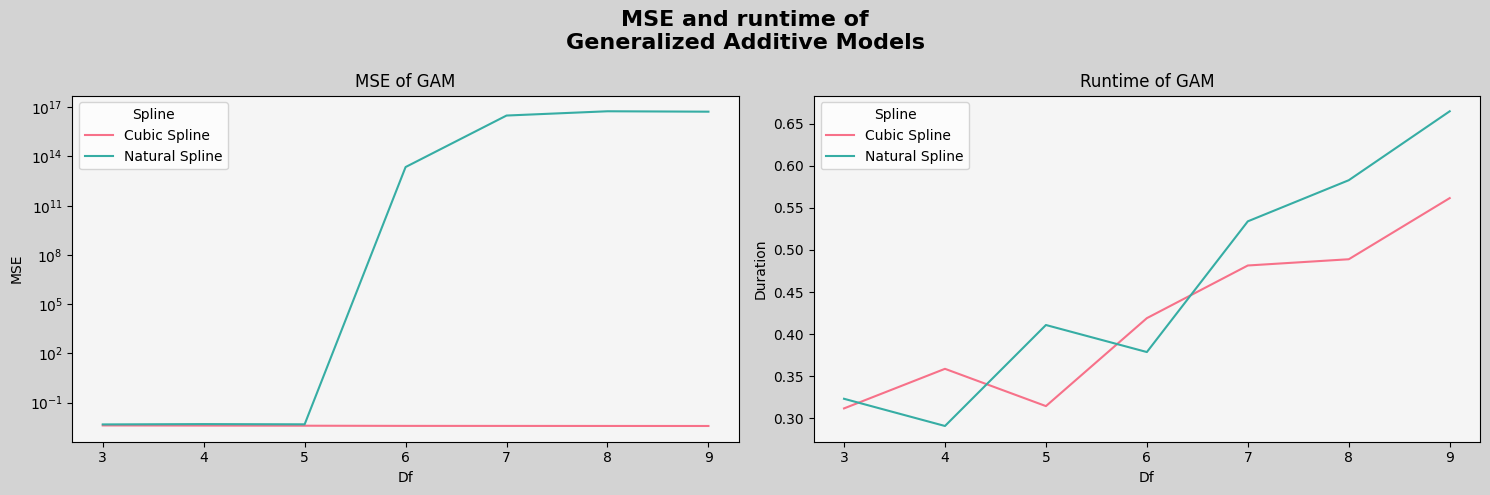

In [ ]:
fig, axs = plt.subplots(1,2,figsize = (15,5))
fig.set_facecolor('lightgrey')
axs = axs.flatten()
fig.suptitle('MSE and runtime of\nGeneralized Additive Models', fontsize=16, weight='bold')
# Accuracy
axs[0].set_facecolor('whitesmoke')
sns.lineplot(data=Report_spline, x = 'Df', y = 'MSE', hue = 'Spline', ax = axs[0], palette='husl')
axs[0].set_title('MSE of GAM', fontsize = 12)
axs[0].set_yscale('log')
# Runtime
axs[1].set_facecolor('whitesmoke')
sns.lineplot(data=Report_spline, x = 'Df', y = 'Duration', hue = 'Spline', ax = axs[1], palette='husl')
axs[1].set_title('Runtime of GAM', fontsize = 12)
plt.tight_layout()
plt.show()

#### **WITH FEATURE SELECTION**

In [ ]:
def KFOLD_GAM(x_train, y_train, spline_type, df, FS):
  # 10 FOLD
  kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train, y_train))
  # List
  duration_list = []
  mse_list = []
  r2_list = []
  # Main
  fold = 0
  for est_idx, val_idx in k_fold_data:
    # Indices of estimation and validation data
    x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    # Index allignment
    x_est.reset_index(drop = True, inplace = True)
    y_est.reset_index(drop = True, inplace = True)
    x_val.reset_index(drop = True, inplace = True)
    y_val.reset_index(drop = True, inplace = True)
    # Standard Scaling
    # x_est, x_val = pd.get_dummies(x_est), pd.get_dummies(x_val)
    scaler = StandardScaler()
    x_est = pd.DataFrame(data = scaler.fit_transform(x_est), columns = list(x_est.columns))
    x_val = pd.DataFrame(data = scaler.transform(x_val), columns = list(x_val.columns))
    # Feature Transformation
    if FS == 'All':
      if spline_type == 'Cubic Spline':
        ## Transform to GAM format data
        ### Estimation data
        x_est = pd.concat([
            dmatrix(f"bs(x_est.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_est.goal_distance": x_est.goal_distance}, return_type='dataframe'),
            dmatrix(f"bs(x_est.angle, df={df}, degree=3, include_intercept=False)", {"x_est.angle": x_est.angle}, return_type='dataframe'),
            dmatrix(f"bs(x_est.teammates_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_est.teammates_in_triangle": x_est.teammates_in_triangle}, return_type='dataframe'),
            dmatrix(f"bs(x_est.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_est.opponents_in_triangle": x_est.opponents_in_triangle}, return_type='dataframe'),
            x_est.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1)
        ], axis = 1)
        ### Validation data
        x_val = pd.concat([
            dmatrix(f"bs(x_val.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_val.goal_distance": x_val.goal_distance}, return_type='dataframe'),
            dmatrix(f"bs(x_val.angle, df={df}, degree=3, include_intercept=False)", {"x_val.angle": x_val.angle}, return_type='dataframe'),
            dmatrix(f"bs(x_val.teammates_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_val.teammates_in_triangle": x_val.teammates_in_triangle}, return_type='dataframe'),
            dmatrix(f"bs(x_val.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_val.opponents_in_triangle": x_val.opponents_in_triangle}, return_type='dataframe'),
            x_val.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1)
        ], axis = 1)
      elif spline_type == 'Natural Spline':
        ## Transform to GAM format data
        ### Estimation data
        x_est = pd.concat([
            dmatrix(f"cr(x_est.goal_distance, df={df})", {"x_est.goal_distance": x_est.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_est.angle, df={df})", {"x_est.angle": x_est.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_est.teammates_in_triangle, df={df})", {"x_est.teammates_in_triangle": x_est.teammates_in_triangle}, return_type='dataframe'),
            dmatrix(f"cr(x_est.opponents_in_triangle, df={df})", {"x_est.opponents_in_triangle": x_est.opponents_in_triangle}, return_type='dataframe'),
            x_est.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1)
        ], axis = 1)
        ### Validation data
        x_val = pd.concat([
            dmatrix(f"cr(x_val.goal_distance, df={df})", {"x_val.goal_distance": x_val.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_val.angle, df={df})", {"x_val.angle": x_val.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_val.teammates_in_triangle, df={df})", {"x_val.teammates_in_triangle": x_val.teammates_in_triangle}, return_type='dataframe'),
            dmatrix(f"cr(x_val.opponents_in_triangle, df={df})", {"x_val.opponents_in_triangle": x_val.opponents_in_triangle}, return_type='dataframe'),
            x_val.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1)
        ], axis = 1)

    elif FS == 'Forward Stepwise':
      if spline_type == 'Cubic Spline':
        ## Transform to GAM format data
        ### Estimation data
        x_est = pd.concat([
            dmatrix(f"bs(x_est.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_est.goal_distance": x_est.goal_distance}, return_type='dataframe'),
            dmatrix(f"bs(x_est.angle, df={df}, degree=3, include_intercept=False)", {"x_est.angle": x_est.angle}, return_type='dataframe'),
            dmatrix(f"bs(x_est.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_est.opponents_in_triangle": x_est.opponents_in_triangle}, return_type='dataframe'),
            x_est.drop(['goal_distance','angle','opponents_in_triangle'], axis = 1)
        ], axis = 1)
        ### Validation data
        x_val = pd.concat([
            dmatrix(f"bs(x_val.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_val.goal_distance": x_val.goal_distance}, return_type='dataframe'),
            dmatrix(f"bs(x_val.angle, df={df}, degree=3, include_intercept=False)", {"x_val.angle": x_val.angle}, return_type='dataframe'),
            dmatrix(f"bs(x_val.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_val.opponents_in_triangle": x_val.opponents_in_triangle}, return_type='dataframe'),
            x_val.drop(['goal_distance','angle','opponents_in_triangle'], axis = 1)
        ], axis = 1)
      elif spline_type == 'Natural Spline':
        ## Transform to GAM format data
        ### Estimation data
        x_est = pd.concat([
            dmatrix(f"cr(x_est.goal_distance, df={df})", {"x_est.goal_distance": x_est.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_est.angle, df={df})", {"x_est.angle": x_est.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_est.opponents_in_triangle, df={df})", {"x_est.opponents_in_triangle": x_est.opponents_in_triangle}, return_type='dataframe'),
            x_est.drop(['goal_distance','angle','opponents_in_triangle'], axis = 1)
        ], axis = 1)
        ### Validation data
        x_val = pd.concat([
            dmatrix(f"cr(x_val.goal_distance, df={df})", {"x_val.goal_distance": x_val.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_val.angle, df={df})", {"x_val.angle": x_val.goal_distance}, return_type='dataframe'),
            dmatrix(f"cr(x_val.opponents_in_triangle, df={df})", {"x_val.opponents_in_triangle": x_val.opponents_in_triangle}, return_type='dataframe'),
            x_val.drop(['goal_distance','angle','opponents_in_triangle'], axis = 1)
        ], axis = 1)

    # Training Phase
    ## GAM (include Natural Spline or Cubic Spline)
    start = time.time()
    LinReg = sm.OLS(y_est, sm.add_constant(x_est)).fit()
    end = time.time()
    mse = mean_squared_error(y_true=y_val, y_pred=LinReg.predict(sm.add_constant(x_val)))
    r2 = r2_score(y_true=y_val, y_pred=LinReg.predict(sm.add_constant(x_val)))
    # Print Report of GAM
    fold += 1
    print(f'FOLD {fold}: MSE = {mse} | Runtime = {end - start}')
    # Report of GAM
    duration_list.append(end-start)
    mse_list.append(mse)
    r2_list.append(r2)
  return np.mean(mse_list), np.mean(r2_list), np.mean(duration_list)

In [ ]:
x_train

,goal_distance,angle,teammates_in_triangle,opponents_in_triangle,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,...,technique_Overhead Kick,technique_Volley,body_part_Left Foot,body_part_Other,body_part_Right Foot,open_goal_True,shot_type_Free Kick,shot_type_Open Play,shot_type_Penalty,deflected_None
9083,8.600000,49.887811,0,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
30986,18.491079,15.893373,0,1,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True
10802,24.821362,8.267733,0,1,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
20156,27.262428,16.426216,0,2,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
80232,18.388312,12.192018,0,1,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,7.792946,54.015234,0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
54890,21.991135,14.851769,0,2,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,True
76825,19.505897,11.416304,0,1,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
860,19.532793,22.365075,0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [ ]:
y_train

,xg
9083,0.112092
30986,0.079083
10802,0.007480
20156,0.028570
80232,0.013486
...,...
6266,0.172307
54890,0.025296
76825,0.019190
860,0.100864


In [ ]:
splines = ['Cubic Spline', 'Natural Spline']
df = [3,4,5,6,7,8,9]
Report_spline_fs = {'Selection':[], 'Spline':[], 'Df':[], 'MSE':[], 'R2':[], 'Duration': []}


for fs in ['All', 'Forward Stepwise']:
  if fs == 'Forward Stepwise':
    print(f'<<<<<<<<<<< Selection: {fs} >>>>>>>>>>>')
    for s in splines:
      for dof in df:
        Report_spline_fs['Selection'].append(fs)
        Report_spline_fs['Spline'].append(s)
        Report_spline_fs['Df'].append(dof)
        acc, r2, runtime = KFOLD_GAM(x_train = x_train.loc[:, FSS_FEATURES],
                                      y_train = y_train,
                                      spline_type = s,
                                      df = dof,
                                      FS = fs)
        Report_spline_fs['MSE'].append(acc)
        Report_spline_fs['R2'].append(r2)
        Report_spline_fs['Duration'].append(runtime)
  elif fs == 'All':
    print(f'<<<<<<<<<<< Selection: {fs} >>>>>>>>>>>')
    for s in splines:
      for dof in df:
        Report_spline_fs['Selection'].append(fs)
        Report_spline_fs['Spline'].append(s)
        Report_spline_fs['Df'].append(dof)
        # try:
        acc, r2, runtime = KFOLD_GAM(x_train = x_train,
                                      y_train = y_train,
                                      spline_type = s,
                                      df = dof,
                                      FS = fs)
        Report_spline_fs['MSE'].append(acc)
        Report_spline_fs['R2'].append(r2)
        Report_spline_fs['Duration'].append(runtime)

<<<<<<<<<<< Selection: All >>>>>>>>>>>
FOLD 1: MSE = 0.003974145492100193 | Runtime = 0.22960114479064941
FOLD 2: MSE = 0.004073077901431221 | Runtime = 0.23859429359436035
FOLD 3: MSE = 0.004484966283675176 | Runtime = 0.2369232177734375
FOLD 4: MSE = 0.004096015034766807 | Runtime = 0.19655346870422363
FOLD 5: MSE = 0.00392039123925053 | Runtime = 0.21489405632019043
FOLD 1: MSE = 0.003908187087760009 | Runtime = 0.27721142768859863
FOLD 2: MSE = 0.0039232252603276195 | Runtime = 0.2764546871185303
FOLD 3: MSE = 0.004191783757856363 | Runtime = 0.2848780155181885
FOLD 4: MSE = 0.004044080619197063 | Runtime = 0.24988293647766113
FOLD 5: MSE = 0.003902141782403789 | Runtime = 0.2550082206726074
FOLD 1: MSE = 0.003845072541422396 | Runtime = 0.3181428909301758
FOLD 2: MSE = 0.0037934285974342606 | Runtime = 0.32925868034362793
FOLD 3: MSE = 0.003940568732727218 | Runtime = 0.5961780548095703
FOLD 4: MSE = 0.004007647901248484 | Runtime = 0.42180514335632324
FOLD 5: MSE = 0.003869773294

In [ ]:
Report_gam_fs_df = pd.DataFrame(Report_spline_fs)
Report_gam_fs_df

,Selection,Spline,Df,MSE,R2,Duration
0,All,Cubic Spline,3,4.109719e-03,8.156211e-01,0.223313
1,All,Cubic Spline,4,3.993884e-03,8.207410e-01,0.268687
2,All,Cubic Spline,5,3.891298e-03,8.252848e-01,0.453642
3,All,Cubic Spline,6,3.819449e-03,8.285033e-01,0.425057
4,All,Cubic Spline,7,3.806291e-03,8.291020e-01,0.381803
5,All,Cubic Spline,8,3.796036e-03,8.295647e-01,0.591210
6,All,Cubic Spline,9,3.782074e-03,8.301909e-01,0.486394
7,All,Natural Spline,3,4.459372e-03,7.997820e-01,0.359099
8,All,Natural Spline,4,4.522731e-03,7.969821e-01,0.330328
9,All,Natural Spline,5,4.403697e-03,8.023477e-01,0.309242


In [ ]:
Report_gam_fs_df.to_csv('/content/drive/MyDrive/SL-Project/CODES/xG_Report_gam_fs.csv')

In [ ]:
temp1 = Report_gam_fs_df[Report_gam_fs_df.Selection == 'All']
temp1[temp1.MSE == np.min(temp1.MSE)]

,Selection,Spline,Df,MSE,R2,Duration
6,All,Cubic Spline,9,0.003782,0.830191,0.486394


In [ ]:
temp2 = Report_gam_fs_df[Report_gam_fs_df.Selection == 'Forward Stepwise']
temp2[temp2.MSE == np.min(temp2.MSE)]

,Selection,Spline,Df,MSE,R2,Duration
20,Forward Stepwise,Cubic Spline,9,0.003832,0.827943,0.246831


## **REGULARIZATION**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

**Regularization method Function**

In [ ]:
def Regular_Kfold(model_name, x_train, y_train, Lambda):
  # 10 FOLD
  kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train, y_train))

  # Dictionary of Result
  Report = {
    'Lambda': [],
    'Validation': [],
    'Train': [],
    'Duration': []
  }

  # Scaler
  scaler = StandardScaler()

  # Main
  for lam in Lambda:
    mse_temp_val = []
    mse_temp_est = []
    duration_list = []
    fold = 0
    print(f'>>>>>>>>>>>>>>>>> Lambda = {lam} <<<<<<<<<<<<<<<<<<<<')

    for est_idx, val_idx in k_fold_data:
      # Indices of estimation and validation data
      x_est, y_est = x_train[est_idx], y_train[est_idx]
      x_val, y_val = x_train[val_idx], y_train[val_idx]

      # Standard scaling
      x_est = scaler.fit_transform(x_est)
      x_val = scaler.transform(x_val)

      # Create model based on the name
      if model_name == 'Ridge':
        model = Ridge(alpha=lam)
      elif model_name == 'Lasso':
        model = Lasso(alpha=lam)
      elif model_name == 'ElasticNet':
        model = ElasticNet(alpha=lam, l1_ratio=0.5, max_iter=5000)

      # Training Model
      start = time.time()
      model.fit(x_est, y_est)
      end = time.time()

      # Prediction
      pred_val = model.predict(x_val)
      mse_temp_val.append(mean_squared_error(y_val, pred_val))

      pred_est = model.predict(x_est)
      mse_temp_est.append(mean_squared_error(y_est, pred_est))

      # Run time
      duration_list.append(end - start)
      fold += 1
      print(f'FOLD {fold}: {mean_squared_error(y_val, pred_val)}')

    # Store results
    Report['Lambda'].append(lam)
    Report['Validation'].append(np.mean(mse_temp_val))
    Report['Train'].append(np.mean(mse_temp_est))
    Report['Duration'].append(np.mean(duration_list))

  return Report

**Data Prepration**

In [ ]:
x_train_array = np.array(x_train)
x_test_array = np.array(x_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

### **RIDGE REGRESSION**

In [ ]:
Lambda = np.logspace(-5,5,11)
Ridge_report = Regular_Kfold('Ridge', x_train_array, y_train_array, Lambda)

>>>>>>>>>>>>>>>>> Lambda = 1e-05 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004286967152434791
FOLD 2: 0.004126153963642943
FOLD 3: 0.004241920487428642
FOLD 4: 0.00433128338202199
FOLD 5: 0.004604726102181352
FOLD 6: 0.004417849027242133
FOLD 7: 0.004801307649389016
FOLD 8: 0.004376158146667161
FOLD 9: 0.004191900454727986
FOLD 10: 0.004445688152529803
>>>>>>>>>>>>>>>>> Lambda = 0.0001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004286967152248877
FOLD 2: 0.004126153961868423
FOLD 3: 0.004241920485921283
FOLD 4: 0.0043312833814042415
FOLD 5: 0.004604726102449267
FOLD 6: 0.004417849025834843
FOLD 7: 0.004801307651058234
FOLD 8: 0.004376158147672156
FOLD 9: 0.0041919004570222735
FOLD 10: 0.0044456881518708125
>>>>>>>>>>>>>>>>> Lambda = 0.001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004286967150389772
FOLD 2: 0.004126153944123362
FOLD 3: 0.004241920470847796
FOLD 4: 0.004331283375226878
FOLD 5: 0.004604726105128489
FOLD 6: 0.00441784901176205
FOLD 7: 0.00480130766775052
FOLD 8: 0.0043761581577222005
FOLD 9: 0.004191900479

In [ ]:
Ridge_report = pd.DataFrame(Ridge_report)
Ridge_report.columns = ['Lambda', 'Validation', 'Train', 'Duration']

print(Ridge_report[Ridge_report['Validation'] == np.min(Ridge_report['Validation'])])

   Lambda  Validation     Train  Duration
5     1.0    0.004382  0.004375   0.04416


### **LASSO REGRESSION**

In [ ]:
Lambda = np.logspace(-5,5,11)
Lasso_report = Regular_Kfold('Lasso', x_train_array, y_train_array, Lambda)

>>>>>>>>>>>>>>>>> Lambda = 1e-05 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004287727706754875
FOLD 2: 0.004125769336017381
FOLD 3: 0.004241405090117588
FOLD 4: 0.004331174340036685
FOLD 5: 0.004605080414251114
FOLD 6: 0.004417362268445802
FOLD 7: 0.004801620936799554
FOLD 8: 0.0043762243608818745
FOLD 9: 0.004192162970890139
FOLD 10: 0.0044457968993811955
>>>>>>>>>>>>>>>>> Lambda = 0.0001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.00429781258387123
FOLD 2: 0.004127367919935423
FOLD 3: 0.004240045838455878
FOLD 4: 0.004333591726731047
FOLD 5: 0.00461188127730055
FOLD 6: 0.0044154336312954845
FOLD 7: 0.004808364501536571
FOLD 8: 0.00438065898102835
FOLD 9: 0.004197958883814644
FOLD 10: 0.004449292556018803
>>>>>>>>>>>>>>>>> Lambda = 0.001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004348590708654051
FOLD 2: 0.004177058289952304
FOLD 3: 0.00428913112929542
FOLD 4: 0.0044088008463856136
FOLD 5: 0.004677525141892839
FOLD 6: 0.004445919485750959
FOLD 7: 0.004898037326544626
FOLD 8: 0.004453787374112687
FOLD 9: 0.0042453596045

In [ ]:
Lasso_report = pd.DataFrame(Lasso_report)
Lasso_report.columns = ['Lambda', 'Validation', 'Train', 'Duration']

print(Lasso_report[Lasso_report['Validation'] == np.min(Lasso_report['Validation'])])

    Lambda  Validation     Train  Duration
0  0.00001    0.004382  0.004375  4.378899


### **ELASTIC NET**

In [ ]:
Lambda = np.logspace(-5,5,11)
ElasticNet_report = Regular_Kfold('ElasticNet', x_train_array, y_train_array, Lambda)

>>>>>>>>>>>>>>>>> Lambda = 1e-05 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004287338586094411
FOLD 2: 0.004125941917430227
FOLD 3: 0.004241648678028981
FOLD 4: 0.0043312173028238615
FOLD 5: 0.004604894602054371
FOLD 6: 0.004417591023797154
FOLD 7: 0.004801459066263709
FOLD 8: 0.004376184098394545
FOLD 9: 0.004192029985815724
FOLD 10: 0.004445733583939795
>>>>>>>>>>>>>>>>> Lambda = 0.0001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004291548486411643
FOLD 2: 0.004125367332550216
FOLD 3: 0.004240072788658043
FOLD 4: 0.004331518547863297
FOLD 5: 0.004607362155945924
FOLD 6: 0.0044159279355405635
FOLD 7: 0.004803872725714959
FOLD 8: 0.004377424149120597
FOLD 9: 0.004194097379714678
FOLD 10: 0.004446807285908619
>>>>>>>>>>>>>>>>> Lambda = 0.001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004327847595262885
FOLD 2: 0.004153963453221476
FOLD 3: 0.004260637891087927
FOLD 4: 0.004368114833524872
FOLD 5: 0.004645657337973702
FOLD 6: 0.004424306947801157
FOLD 7: 0.004851020291522477
FOLD 8: 0.004416210156196884
FOLD 9: 0.00422222927

In [ ]:
ElasticNet_report = pd.DataFrame(ElasticNet_report)
ElasticNet_report.columns = ['Lambda', 'Validation', 'Train', 'Duration']

print(ElasticNet_report[ElasticNet_report['Validation'] == np.min(ElasticNet_report['Validation'])])

    Lambda  Validation     Train  Duration
0  0.00001    0.004382  0.004375  5.482681


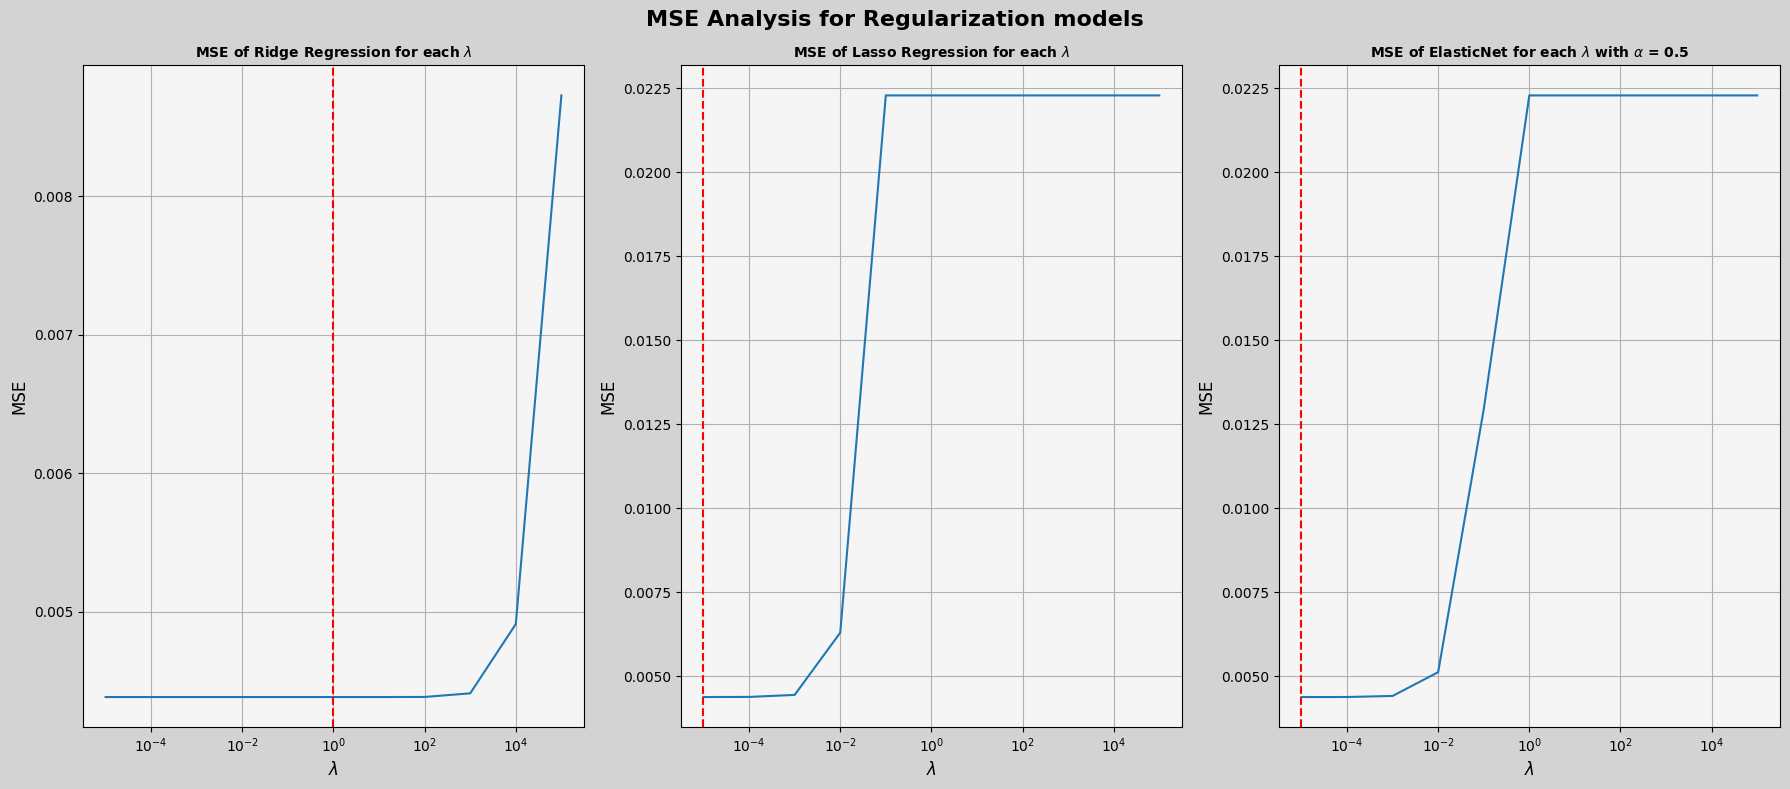

In [ ]:
fig, axs = plt.subplots(1,3,figsize = (18,8))
axs = axs.flatten()
fig.set_facecolor('lightgrey')

fig.suptitle('MSE Analysis for Regularization models', fontsize=16, weight='bold')

# Ridge
axs[0].set_facecolor('whitesmoke')
sns.lineplot(data = Ridge_report, x = 'Lambda', y = 'Validation', ax=axs[0])
axs[0].axvline(x = Ridge_report[Ridge_report['Validation'] == np.min(Ridge_report['Validation'])].iloc[0,0],
           color = 'red',
           linestyle = '--')
axs[0].set_title('MSE of Ridge Regression for each $\lambda$', fontsize = 10, weight = 'bold')
axs[0].set_xscale('log')
axs[0].set_xlabel(r'$\lambda$', fontsize = 12)
axs[0].set_ylabel('MSE', fontsize = 12)
axs[0].grid()

# Lasso
axs[1].set_facecolor('whitesmoke')
sns.lineplot(data = Lasso_report, x = 'Lambda', y = 'Validation', ax=axs[1])
axs[1].axvline(x = Lasso_report[Lasso_report['Validation'] == np.min(Lasso_report['Validation'])].iloc[0,0],
           color = 'red',
           linestyle = '--')
axs[1].set_title('MSE of Lasso Regression for each $\lambda$', fontsize = 10, weight = 'bold')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$\lambda$', fontsize = 12)
axs[1].set_ylabel('MSE', fontsize = 12)
axs[1].grid()

# ElasticNet
axs[2].set_facecolor('whitesmoke')
sns.lineplot(data = ElasticNet_report, x = 'Lambda', y = 'Validation', ax=axs[2])
axs[2].axvline(x = ElasticNet_report[ElasticNet_report['Validation'] == np.min(ElasticNet_report['Validation'])].iloc[0,0],
           color = 'red',
           linestyle = '--')
axs[2].set_title(r'MSE of ElasticNet for each $\lambda$ with $\alpha$ = 0.5', fontsize = 10, weight = 'bold')
axs[2].set_xscale('log')
axs[2].set_xlabel(r'$\lambda$', fontsize = 12)
axs[2].set_ylabel('MSE', fontsize = 12)
axs[2].grid()

plt.tight_layout()
plt.show()


### **WITH FEATURE SELECTION**

In [ ]:
def Regular_Kfold_FS(model_name, x_train, y_train, Lambda):
  # 10 FOLD
  kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
  k_fold_data = list(kfold.split(x_train, y_train))
  # Dictionary of Result
  Report = {
    'Lambda': [],
    'MSE': [],
    'R2': [],
    'Duration': []
  }

  # Scaler
  scaler = StandardScaler()

  # Main
  for lam in Lambda:
    mse_temp_val = []
    r2_temp_val = []
    duration_list = []
    fold = 0
    print(f'>>>>>>>>>>>>>>>>> Lambda = {lam} <<<<<<<<<<<<<<<<<<<<')

    for est_idx, val_idx in k_fold_data:
      # Indices of estimation and validation data
      x_est, y_est = x_train.iloc[est_idx], y_train.iloc[est_idx]
      x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]

      # Standard scaling
      x_est = scaler.fit_transform(x_est)
      x_val = scaler.transform(x_val)

      x_est = np.array(x_est)
      x_val = np.array(x_val)

      y_est = np.array(y_est)
      y_val = np.array(y_val)
      # Create model based on the name
      if model_name == 'Ridge':
        model = Ridge(alpha=lam)
      elif model_name == 'Lasso':
        model = Lasso(alpha=lam)
      elif model_name == 'ElasticNet':
        model = ElasticNet(alpha=lam, l1_ratio=0.5, max_iter=5000)

      # Training Model
      start = time.time()
      model.fit(x_est, y_est)
      end = time.time()
      # Prediction
      pred_val = model.predict(x_val)
      mse_temp_val.append(mean_squared_error(y_val, pred_val))
      r2_temp_val = r2_score(y_val, pred_val)

      # Run time
      duration_list.append(end - start)
      fold += 1
      print(f'FOLD {fold}: {mean_squared_error(y_val, pred_val)}')

    # Store results
    Report['Lambda'].append(lam)
    Report['MSE'].append(np.mean(mse_temp_val))
    Report['R2'].append(np.mean(r2_temp_val))
    Report['Duration'].append(np.mean(duration_list))

  return Report

In [ ]:
x_train_selected_array = np.array(x_train_selected)
x_test_selected_array = np.array(x_test_selected)

**Ridge Regression**

In [ ]:
Lambda = np.logspace(-5,5,11)
Ridge_report_fs = []

for fs in FS:
  print(f'<<<<<<<<<<< Selection: {fs} >>>>>>>>>>>')
  if fs == 'selected features':
    x_train__ = x_train_selected

  elif fs == 'All features':
    x_train__ = x_train

  Ridge_report_fs.append(Regular_Kfold_FS('Ridge', x_train__, y_train, Lambda))


<<<<<<<<<<< Selection: selected_features >>>>>>>>>>>
>>>>>>>>>>>>>>>>> Lambda = 1e-05 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004210366062176178
FOLD 2: 0.004289276904794402
FOLD 3: 0.00451081726994194
FOLD 4: 0.00458937120485358
FOLD 5: 0.004318540101426856
>>>>>>>>>>>>>>>>> Lambda = 0.0001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004210366061316053
FOLD 2: 0.004289276903474917
FOLD 3: 0.004510817269267672
FOLD 4: 0.004589371206585058
FOLD 5: 0.004318540102414865
>>>>>>>>>>>>>>>>> Lambda = 0.001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004210366052714894
FOLD 2: 0.004289276890280225
FOLD 3: 0.0045108172625251235
FOLD 4: 0.00458937122389996
FOLD 5: 0.0043185401122950275
>>>>>>>>>>>>>>>>> Lambda = 0.01 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.00421036596671312
FOLD 2: 0.004289276758348657
FOLD 3: 0.004510817195111496
FOLD 4: 0.004589371397061845
FOLD 5: 0.004318540211103588
>>>>>>>>>>>>>>>>> Lambda = 0.1 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004210365107675857
FOLD 2: 0.004289275440567484
FOLD 3: 0.004510816522161266
FOLD 4: 0.0045

In [ ]:
Ridge_report_df = pd.concat([pd.DataFrame(Ridge_report_fs[0]), pd.DataFrame(Ridge_report_fs[1])] , axis=0, ignore_index=True)
Ridge_report_df['Selection'] = np.array(['selected features'] * (len(Ridge_report_df) // 2) + ['All features'] * (len(Ridge_report_df) // 2))
Ridge_report_df = Ridge_report_df[['Selection','Lambda','MSE','R2','Duration']]
Ridge_report_df

,Selection,Lambda,MSE,R2,Duration
0,selected features,0.00001,0.004384,0.798886,0.024609
1,selected features,0.00010,0.004384,0.798886,0.035504
2,selected features,0.00100,0.004384,0.798886,0.053582
3,selected features,0.01000,0.004384,0.798886,0.056305
4,selected features,0.10000,0.004384,0.798886,0.064499
5,selected features,1.00000,0.004384,0.798886,0.043957
6,selected features,10.00000,0.004384,0.798881,0.050651
7,selected features,100.00000,0.004385,0.798808,0.021058
8,selected features,1000.00000,0.004416,0.797328,0.019078
9,selected features,10000.00000,0.004980,0.771659,0.022428


In [ ]:
print('Best model with Selected Features:')
Ridge_report_df[
    (Ridge_report_df['Selection'] == 'selected features') &
    (Ridge_report_df['MSE'] == Ridge_report_df.loc[Ridge_report_df['Selection'] == 'selected features', 'MSE'].min())
]

Best model with Selected Features:


,Selection,Lambda,MSE,R2,Duration
5,selected features,1.0,0.004384,0.798886,0.043957


In [ ]:
print('Best model with ALL Features:')
Ridge_report_df[
    (Ridge_report_df['Selection'] == 'All features') &
    (Ridge_report_df['MSE'] == Ridge_report_df.loc[Ridge_report_df['Selection'] == 'All features', 'MSE'].min())
]

Best model with ALL Features:


,Selection,Lambda,MSE,R2,Duration
16,All features,1.0,0.004384,0.798886,0.014298


In [ ]:
Ridge_report_df.to_csv('/content/drive/MyDrive/Ridge_regression_reg_report_fs.csv')

**Lasso Regression**

In [ ]:
Lasso_report_fs = []

for fs in FS:
  print(f'<<<<<<<<<<< Selection: {fs} >>>>>>>>>>>')
  if fs == 'selected features':
    x_train__ = x_train_selected

  elif fs == 'All features':
    x_train__ = x_train

  Lasso_report_fs.append(Regular_Kfold_FS('Lasso', x_train__, y_train, Lambda))

<<<<<<<<<<< Selection: selected_features >>>>>>>>>>>
>>>>>>>>>>>>>>>>> Lambda = 1e-05 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004210638344785247
FOLD 2: 0.00428892084785745
FOLD 3: 0.004510726700520954
FOLD 4: 0.004589579584941581
FOLD 5: 0.0043187233615121475
>>>>>>>>>>>>>>>>> Lambda = 0.0001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0042173354816979714
FOLD 2: 0.00428903273760552
FOLD 3: 0.004512857003199312
FOLD 4: 0.00459544687894183
FOLD 5: 0.00432324151267731
>>>>>>>>>>>>>>>>> Lambda = 0.001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004264350109548243
FOLD 2: 0.0043516669568159526
FOLD 3: 0.004560264034824052
FOLD 4: 0.004679564046194594
FOLD 5: 0.004377516315175131
>>>>>>>>>>>>>>>>> Lambda = 0.01 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.005994162293956268
FOLD 2: 0.006285330404125279
FOLD 3: 0.006291708660612621
FOLD 4: 0.0067226956968566495
FOLD 5: 0.00619979730279403
>>>>>>>>>>>>>>>>> Lambda = 0.1 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.02198900632984259
FOLD 2: 0.022413051592095844
FOLD 3: 0.022975181180411
FOLD 4: 0.0225538

In [ ]:
Lasso_report_df = pd.concat([pd.DataFrame(Lasso_report_fs[0]), pd.DataFrame(Lasso_report_fs[1])] , axis=0, ignore_index=True)
Lasso_report_df['Selection'] = np.array(['selected features'] * (len(Lasso_report_df) // 2) + ['All features'] * (len(Lasso_report_df) // 2))
Lasso_report_df = Lasso_report_df[['Selection','Lambda','MSE','R2','Duration']]
Lasso_report_df

,Selection,Lambda,MSE,R2,Duration
0,selected features,0.00001,0.004384,0.798878,6.518187
1,selected features,0.00010,0.004388,0.798667,2.808561
2,selected features,0.00100,0.004447,0.796140,0.225413
3,selected features,0.01000,0.006299,0.711276,0.220394
4,selected features,0.10000,0.022281,-0.000060,0.036608
5,selected features,1.00000,0.022281,-0.000060,0.350391
6,selected features,10.00000,0.022281,-0.000060,0.193042
7,selected features,100.00000,0.022281,-0.000060,0.067871
8,selected features,1000.00000,0.022281,-0.000060,0.053529
9,selected features,10000.00000,0.022281,-0.000060,0.107561


In [ ]:
print('Best model with Selected Features:')
Lasso_report_df[
    (Lasso_report_df['Selection'] == 'selected features') &
    (Lasso_report_df['MSE'] == Lasso_report_df.loc[Lasso_report_df['Selection'] == 'selected features', 'MSE'].min())
]

Best model with Selected Features:


,Selection,Lambda,MSE,R2,Duration
0,selected features,0.00001,0.004384,0.798878,6.518187


In [ ]:
print('Best model with ALL Features:')
Lasso_report_df[
    (Lasso_report_df['Selection'] == 'All features') &
    (Lasso_report_df['MSE'] == Lasso_report_df.loc[Lasso_report_df['Selection'] == 'All features', 'MSE'].min())
]

Best model with ALL Features:


,Selection,Lambda,MSE,R2,Duration
11,All features,0.00001,0.004384,0.798878,12.369153


In [ ]:
Lasso_report_df.to_csv('/content/drive/MyDrive/Lasso_report_reg_report_fs.csv')

**Elastic  Net**

In [ ]:
Elastic_net_report_fs = []

for fs in FS:
  print(f'<<<<<<<<<<< Selection: {fs} >>>>>>>>>>>')
  if fs == 'selected features':
    x_train__ = x_train_selected

  elif fs == 'All features':
    x_train__ = x_train

  Elastic_net_report_fs.append(Regular_Kfold_FS('ElasticNet', x_train__, y_train, Lambda))

<<<<<<<<<<< Selection: selected_features >>>>>>>>>>>
>>>>>>>>>>>>>>>>> Lambda = 1e-05 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004210488478334516
FOLD 2: 0.004289085741001312
FOLD 3: 0.004510760523925487
FOLD 4: 0.004589469579464815
FOLD 5: 0.0043186269314699375
>>>>>>>>>>>>>>>>> Lambda = 0.0001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.0042127161397114655
FOLD 2: 0.004288244345791169
FOLD 3: 0.0045110282198436305
FOLD 4: 0.004591411283789504
FOLD 5: 0.0043201658367329355
>>>>>>>>>>>>>>>>> Lambda = 0.001 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004244549144725993
FOLD 2: 0.004317121706288375
FOLD 3: 0.004533607283725215
FOLD 4: 0.004635751802931334
FOLD 5: 0.004349966286514639
>>>>>>>>>>>>>>>>> Lambda = 0.01 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.004870550183776632
FOLD 2: 0.005062981541816698
FOLD 3: 0.005163578713985128
FOLD 4: 0.005473019507767815
FOLD 5: 0.005041142348977976
>>>>>>>>>>>>>>>>> Lambda = 0.1 <<<<<<<<<<<<<<<<<<<<
FOLD 1: 0.012448483669851147
FOLD 2: 0.013171933688110099
FOLD 3: 0.013289002115798214
FOLD 4: 

In [ ]:
Elastic_net_report_df = pd.concat([pd.DataFrame(Elastic_net_report_fs[0]), pd.DataFrame(Elastic_net_report_fs[1])] , axis=0, ignore_index=True)
Elastic_net_report_df['Selection'] = np.array(['selected features'] * (len(Elastic_net_report_df) // 2) + ['All features'] * (len(Elastic_net_report_df) // 2))
Elastic_net_report_df = Elastic_net_report_df[['Selection','Lambda','MSE','R2','Duration']]
Elastic_net_report_df

,Selection,Lambda,MSE,R2,Duration
0,selected features,0.00001,0.004384,0.798882,13.271221
1,selected features,0.00010,0.004385,0.798810,0.503735
2,selected features,0.00100,0.004416,0.797423,0.098143
3,selected features,0.01000,0.005122,0.765235,0.072626
4,selected features,0.10000,0.012943,0.418576,0.023119
5,selected features,1.00000,0.022281,-0.000060,0.012621
6,selected features,10.00000,0.022281,-0.000060,0.013164
7,selected features,100.00000,0.022281,-0.000060,0.020817
8,selected features,1000.00000,0.022281,-0.000060,0.124284
9,selected features,10000.00000,0.022281,-0.000060,0.024838


In [ ]:
print('Best model with Selected Features:')
Elastic_net_report_df[
    (Elastic_net_report_df['Selection'] == 'selected features') &
    (Elastic_net_report_df['MSE'] == Elastic_net_report_df.loc[Elastic_net_report_df['Selection'] == 'selected features', 'MSE'].min())
]

Best model with Selected Features:


,Selection,Lambda,MSE,R2,Duration
0,selected features,0.00001,0.004384,0.798882,13.271221


In [ ]:
print('Best model with ALL Features:')
Elastic_net_report_df[
    (Elastic_net_report_df['Selection'] == 'All features') &
    (Elastic_net_report_df['MSE'] == Elastic_net_report_df.loc[Elastic_net_report_df['Selection'] == 'All features', 'MSE'].min())
]

Best model with ALL Features:


,Selection,Lambda,MSE,R2,Duration
11,All features,0.00001,0.004384,0.798882,8.9848


In [ ]:
Elastic_net_report_df.to_csv('/content/drive/MyDrive/Elastic_net_regression_report_df.csv')

## **MULTI-LAYER PERCEPTRON**

**IMPORT REQUIRED LIBRARIES**

In [ ]:
import torch
from torch import nn
import time

In [ ]:
class MLP(nn.Module):
    # Define the topology
    def __init__(self, input_size, hidden_size, output_size, n_hidden_layer, act_func):
        super(MLP, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_hidden_layer = n_hidden_layer
        self.act_func = act_func

        if self.n_hidden_layer == 1:
          self.layers = nn.Sequential(
              nn.Linear(self.input_size, self.hidden_size),
              nn.ReLU() if self.act_func == 'Relu' else nn.Tanh(),
              nn.Linear(self.hidden_size, self.output_size)
          )

        elif self.n_hidden_layer == 2:
          self.layers = nn.Sequential(
              nn.Linear(self.input_size, self.hidden_size),
              nn.ReLU() if self.act_func == 'Relu' else nn.Tanh(),
              nn.Linear(self.hidden_size, self.hidden_size),
              nn.ReLU() if self.act_func == 'Relu' else nn.Tanh(),
              nn.Linear(self.hidden_size, self.output_size)
          )

    # forward propagation
    def forward(self, x):
        return self.layers(x)

In [ ]:
def torch_r2_score(y_true, y_pred):
    # Calculate SS_res and SS_tot
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    # Calculate R^2
    r2 = 1 - (ss_res / ss_tot)
    return r2.item()  # Return as a Python float

In [ ]:
def Kfold_MLP(X, Y, input_size, hidden_size, output_size, n_hidden_layer, act_func, epochs, lr, random_state):

  # Convert to torch tensors
  X_array = np.array(X).astype(np.float32)
  Y_array = np.array(Y).astype(np.float32)
  X_tensor = torch.from_numpy(X_array)
  Y_tensor = torch.from_numpy(Y_array)

  # List of 10-Fold CV's metrics
  kfold_mse = []
  duration_list = []
  kfold_r2 = []

  # Hyperparameter
  input_size = input_size
  hidden_size = hidden_size
  output_size = output_size
  n_hidden_layer = n_hidden_layer
  act_func = act_func
  epochs = epochs
  learning_rate = lr
  random_state = random_state
  # print('n_hidden_layer: ', n_hidden_layer)

  # 5-FOLD
  kf = KFold(n_splits = 5, shuffle=True, random_state=random_state)

  for fold, (est_idx, val_idx) in enumerate(kf.split(X_array)):
    # Split est val
    x_est, x_val = X_tensor[est_idx], X_tensor[val_idx]
    y_est, y_val = Y_tensor[est_idx], Y_tensor[val_idx]

    # Scale
    scaler = StandardScaler()
    x_est_scaled = scaler.fit_transform(x_est)
    x_val_scaled = scaler.transform(x_val)
    # Convert to float 32bit
    x_est_scaled = x_est_scaled.astype(np.float32)
    x_val_scaled = x_val_scaled.astype(np.float32)
    # Convert to torch tensors
    x_est_scaled = torch.from_numpy(x_est_scaled)
    x_val_scaled = torch.from_numpy(x_val_scaled)

    # print(f'x_est shape: {x_est_scaled.shape} | type: {type(x_est_scaled)}')
    # print(f'x_val shape: {x_val_scaled.shape} | type: {type(x_val_scaled)}')

    y_est, y_val = y_est.unsqueeze(1), y_val.unsqueeze(1)

    # print(f'y_est shape: {y_est.shape} | type: {type(y_est)}')
    # print(f'y_val shape: {y_val.shape} | type: {type(y_val)}')

    # Initialize the model, loss, and optimizer
    model = MLP(input_size = input_size,
                hidden_size = hidden_size,
                output_size = output_size,
                n_hidden_layer = n_hidden_layer,
                act_func = act_func)

    # Mean Squared Loss
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    start = time.time()
    for epoch in range(epochs):
        model.train()
        # Forward pass
        outputs = model(x_est_scaled)
        loss = criterion(outputs, y_est)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    end = time.time()
    duration_list.append(end - start)
    # Evaluation step
    model.eval()
    with torch.no_grad():
        val_preds = model(x_val_scaled)
        val_mse = criterion(val_preds, y_val).float()
        val_r2 = torch_r2_score(y_true= y_val, y_pred = val_preds)
        kfold_mse.append(val_mse)
        kfold_r2.append(val_r2)

    # print(f'Fold {fold+1}: accuracy = {kfold_acc[-1]} | duration = {duration_list[-1]}')

  return np.mean(kfold_mse), np.mean(duration_list), np.mean(kfold_r2)

In [ ]:
epoches = [30, 60]
lr_list = [0.001, 0.01, 0.1]
hidden_size_list = [16, 32, 64]
act_list = ['Relu', 'Tanh']
nh_list = [1, 2]

In [ ]:
MSE = []
DUR = []
EPOCH = []
LR = []
HIDDEN_SIZE = []
ACT = []
NHL = []
R2 = []
models = 0
for e in epoches:
  for lr in lr_list:
    for h in hidden_size_list:
      for act in act_list:
        for nh in nh_list:
          mse, duration, r2 = Kfold_MLP(x_train, y_train,
                                    input_size = 29, hidden_size = h,
                                    output_size = 1, n_hidden_layer = nh,
                                    act_func = act, epochs = e, lr = lr,
                                    random_state = 42)
          MSE.append(mse)
          DUR.append(duration)
          EPOCH.append(e)
          LR.append(lr)
          HIDDEN_SIZE.append(h)
          ACT.append(act)
          NHL.append(nh)
          R2.append(r2)
          models += 1
          print(f'Models {models}')

Models 1
Models 2
Models 3
Models 4
Models 5
Models 6
Models 7
Models 8
Models 9
Models 10
Models 11
Models 12
Models 13
Models 14
Models 15
Models 16
Models 17
Models 18
Models 19
Models 20
Models 21
Models 22
Models 23
Models 24
Models 25
Models 26
Models 27
Models 28
Models 29
Models 30
Models 31
Models 32
Models 33
Models 34
Models 35
Models 36
Models 37
Models 38
Models 39
Models 40
Models 41
Models 42
Models 43
Models 44
Models 45
Models 46
Models 47
Models 48
Models 49
Models 50
Models 51
Models 52
Models 53
Models 54
Models 55
Models 56
Models 57
Models 58
Models 59
Models 60
Models 61
Models 62
Models 63
Models 64
Models 65
Models 66
Models 67
Models 68
Models 69
Models 70
Models 71
Models 72


In [ ]:
Report_MLP = {'EPOCH': EPOCH,
              'LR': LR,
              'HIDDEN_SIZE': HIDDEN_SIZE,
              'ACT': ACT,
              'NHL': NHL,
              'MSE': MSE,
              'R2':R2,
              'Duration': DUR}
Report_MLP_df = pd.DataFrame(Report_MLP)
Report_MLP_df

,EPOCH,LR,HIDDEN_SIZE,ACT,NHL,MSE,R2,Duration
0,30,0.001,16,Relu,1,0.034811,-0.559305,0.267231
1,30,0.001,16,Relu,2,0.015206,0.316917,0.400774
2,30,0.001,16,Tanh,1,0.015103,0.321591,0.361888
3,30,0.001,16,Tanh,2,0.010271,0.538074,0.709041
4,30,0.001,32,Relu,1,0.012494,0.438220,0.474449
...,...,...,...,...,...,...,...,...
67,60,0.100,32,Tanh,2,0.008875,0.601395,2.353565
68,60,0.100,64,Relu,1,0.005383,0.758575,2.074699
69,60,0.100,64,Relu,2,0.018562,0.171849,5.056874
70,60,0.100,64,Tanh,1,0.006941,0.688146,2.319812


**VARIATION OF LOSS PER EPOCH**

In [ ]:
Report_MLP_df[Report_MLP_df['MSE'] == np.min(Report_MLP_df['MSE'])]

,EPOCH,LR,HIDDEN_SIZE,ACT,NHL,MSE,R2,Duration
53,60,0.01,32,Relu,2,0.003099,0.86081,1.755418


In [ ]:
Report_MLP_df.to_csv('/content/drive/MyDrive/SL-Project/CODES/xPass_Report_MLP.csv')

In [ ]:
def TRAIN_MLP(X, Y,input_size, hidden_size, output_size, n_hidden_layer, act_func, epochs, lr, random_state):
  # Input data
  scaler = StandardScaler()
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # Convert to torch tensors
  X_train_array, X_test_array = np.array(X_train).astype(np.float32), np.array(X_test).astype(np.float32)
  Y_train_array, Y_test_array = np.array(Y_train).astype(np.float32), np.array(Y_test).astype(np.float32)
  X__train_tensor, X__test_tensor = torch.from_numpy(X_train_array), torch.from_numpy(X_test_array)
  Y__train_tensor, Y__test_tensor = torch.from_numpy(Y_train_array).unsqueeze(1), torch.from_numpy(Y_test_array).unsqueeze(1)
  # Hyperparameter
  input_size = input_size
  hidden_size = hidden_size
  output_size = output_size
  n_hidden_layer = n_hidden_layer
  act_func = act_func
  epochs = epochs
  learning_rate = lr
  random_state = random_state
  # Initialize the model, loss, and optimizer
  model = MLP(input_size = input_size,
              hidden_size = hidden_size,
              output_size = output_size,
              n_hidden_layer = n_hidden_layer,
              act_func = act_func)
  # MSE Loss
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  # Training loop
  # Train history dict
  # HIST_DICT = {
  #     'EPOCH':[],
  #     'TRN_MISCLS':[],
  #     'TST_MISCLS':[]
  #     }

  for epoch in range(epochs):
    model.train()
    # Forward pass
    outputs = model(X__train_tensor)
    loss = criterion(outputs, Y__train_tensor)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Evaluation step
  model.eval()
  with torch.no_grad():
    outputs = model(X__test_tensor)
    tst_preds = outputs.float()

  return tst_preds

In [ ]:
len(x_train.columns), len(FSS_FEATURES)

(29, 15)

#### **WITH FEATURE SELECTION**

In [ ]:
R2 = []
MSE = []
DUR = []
EPOCH = []
LR = []
HIDDEN_SIZE = []
ACT = []
NHL = []
models = 0

for fs in ['All', 'Forward Stepwise']:

  if fs == 'All':
    for e in epoches:
      for lr in lr_list:
        for h in hidden_size_list:
          for act in act_list:
            for nh in nh_list:
              mse, duration, r2 = Kfold_MLP(x_train, y_train,
                                        input_size = 29, hidden_size = h,
                                        output_size = 1, n_hidden_layer = nh,
                                        act_func = act, epochs = e, lr = lr,
                                        random_state = 42)
              MSE.append(mse)
              R2.append(r2)
              DUR.append(duration)
              EPOCH.append(e)
              LR.append(lr)
              HIDDEN_SIZE.append(h)
              ACT.append(act)
              NHL.append(nh)

              models += 1
              print(f'Models {models}')

  elif fs == 'Forward Stepwise':
    for e in epoches:
      for lr in lr_list:
        for h in hidden_size_list:
          for act in act_list:
            for nh in nh_list:
              mse, duration, r2 = Kfold_MLP(x_train.loc[:, FSS_FEATURES], y_train,
                                        input_size = 15, hidden_size = h,
                                        output_size = 1, n_hidden_layer = nh,
                                        act_func = act, epochs = e, lr = lr,
                                        random_state = 42)
              MSE.append(mse)
              R2.append(r2)
              DUR.append(duration)
              EPOCH.append(e)
              LR.append(lr)
              HIDDEN_SIZE.append(h)
              ACT.append(act)
              NHL.append(nh)

              models += 1
              print(f'Models {models}')

Models 1
Models 2
Models 3
Models 4
Models 5
Models 6
Models 7
Models 8
Models 9
Models 10
Models 11
Models 12
Models 13
Models 14
Models 15
Models 16
Models 17
Models 18
Models 19
Models 20
Models 21
Models 22
Models 23
Models 24
Models 25
Models 26
Models 27
Models 28
Models 29
Models 30
Models 31
Models 32
Models 33
Models 34
Models 35
Models 36
Models 37
Models 38
Models 39
Models 40
Models 41
Models 42
Models 43
Models 44
Models 45
Models 46
Models 47
Models 48
Models 49
Models 50
Models 51
Models 52
Models 53
Models 54
Models 55
Models 56
Models 57
Models 58
Models 59
Models 60
Models 61
Models 62
Models 63
Models 64
Models 65
Models 66
Models 67
Models 68
Models 69
Models 70
Models 71
Models 72
Models 73
Models 74
Models 75
Models 76
Models 77
Models 78
Models 79
Models 80
Models 81
Models 82
Models 83
Models 84
Models 85
Models 86
Models 87
Models 88
Models 89
Models 90
Models 91
Models 92
Models 93
Models 94
Models 95
Models 96
Models 97
Models 98
Models 99
Models 100
Models 1

In [ ]:
Report_mlp_fs = {'selection': 72 * ['All'] + 72 * ['Forward Stepwise'],
                 'EPOCH': EPOCH,
                 'LR': LR,
                 'HIDDEN_SIZE': HIDDEN_SIZE,
                 'ACT': ACT,
                 'NHL': NHL,
                 'MSE': MSE,
                 'R2':R2,
                 'Duration': DUR}

In [ ]:
Report_mlp_fs_df = pd.DataFrame(Report_mlp_fs)
Report_mlp_fs_df

,selection,EPOCH,LR,HIDDEN_SIZE,ACT,NHL,MSE,R2,Duration
0,All,30,0.001,16,Relu,1,0.028774,-0.284148,0.331619
1,All,30,0.001,16,Relu,2,0.030211,-0.377203,0.472261
2,All,30,0.001,16,Tanh,1,0.023579,-0.056618,0.312380
3,All,30,0.001,16,Tanh,2,0.011090,0.501641,0.516656
4,All,30,0.001,32,Relu,1,0.014399,0.352744,0.458231
...,...,...,...,...,...,...,...,...,...
139,Forward Stepwise,60,0.100,32,Tanh,2,0.007055,0.683081,2.178167
140,Forward Stepwise,60,0.100,64,Relu,1,0.004279,0.807521,1.655550
141,Forward Stepwise,60,0.100,64,Relu,2,0.020085,0.097169,4.079074
142,Forward Stepwise,60,0.100,64,Tanh,1,0.005220,0.765598,2.085050


In [ ]:
Report_mlp_fs_df.to_csv('/content/drive/MyDrive/SL-Project/CODES/SL_Report/xG_Report_mlp_fs.csv')

In [ ]:
temp1 = Report_mlp_fs_df[Report_mlp_fs_df.selection == 'All']
temp1[temp1.MSE == np.min(temp1.MSE)]

,selection,EPOCH,LR,HIDDEN_SIZE,ACT,NHL,MSE,R2,Duration
57,All,60,0.01,64,Relu,2,0.003238,0.854596,4.477391


In [ ]:
temp2 = Report_mlp_fs_df[Report_mlp_fs_df.selection == 'Forward Stepwise']
temp2[temp2.MSE == np.min(temp2.MSE)]

,selection,EPOCH,LR,HIDDEN_SIZE,ACT,NHL,MSE,R2,Duration
125,Forward Stepwise,60,0.01,32,Relu,2,0.003074,0.861945,1.801265


## **TREE-BASED MODELS**

### **REGRESSION TREE**

**IMPORT REQUIRED LIBRARIES**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def KFOLD_DT(x_train, y_train, max_leaf_nodes):
  # Initial list
  duration_list = []
  mse_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
  fold = 0
  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Start time
    start = time.time()
    # Construct the Decision tree classifier
    dt_reg = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 42)
    dt_reg = dt_reg.fit(x_est, y_est)
    end = time.time()
    mse_list.append(mean_squared_error(y_true= y_val, y_pred = dt_reg.predict(x_val)))
    duration_list.append(end - start)
    fold += 1
    # print(f'Fold {fold}: accuracy = {accuracy_list[-1]} | duration = {end - start}')
  return np.mean(mse_list), np.mean(duration_list)

In [ ]:
Report_dt_reg = {'max_leaf_nodes':[], 'mse':[], 'duration':[]}
for i in list(np.arange(10, 401, 20)):
  Report_dt_reg['max_leaf_nodes'].append(i)
  DT_output = KFOLD_DT(x_train, y_train, i)
  Report_dt_reg['mse'].append(DT_output[0])
  Report_dt_reg['duration'].append(DT_output[1])
  # if i % 10 == 0: print(f"DECISION TREE: max_leaf_nodes = {i} | mse = {Report_dt_reg['mse'][-1]}")

In [ ]:
Report_dt_reg_df = pd.DataFrame(Report_dt_reg)
Report_dt_reg_df.head()

,max_leaf_nodes,mse,duration
0,10,0.005563,0.162193
1,30,0.004078,0.221232
2,50,0.003644,0.241393
3,70,0.003382,0.380255
4,90,0.003248,0.292750


In [ ]:
Report_dt_reg_df[Report_dt_reg_df['mse'] == np.min(Report_dt_reg_df['mse'])]

,max_leaf_nodes,mse,duration
11,230,0.003021,0.348858


In [ ]:
Report_dt_reg_df['max_leaf_nodes'] = Report_dt_reg_df['max_leaf_nodes'].astype(str)

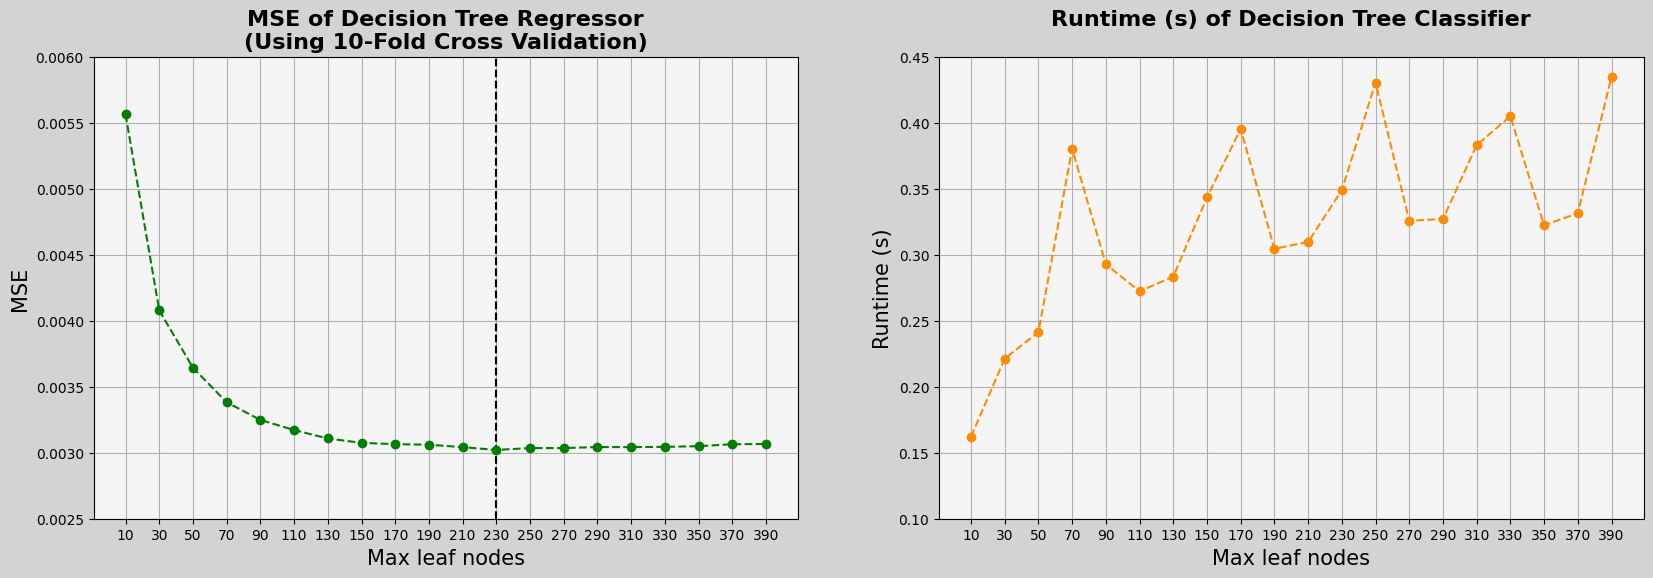

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))
axs = axs.flatten()
fig.set_facecolor('lightgrey')

# ACCURACY
axs[0].set_facecolor('whitesmoke')
axs[0].axvline(x = 11, ls = '--', color = 'black')
axs[0].plot(Report_dt_reg_df['max_leaf_nodes'], Report_dt_reg_df['mse'], marker = 'o', color = 'green', ls = '--')
axs[0].set_title('MSE of Decision Tree Regressor\n(Using 10-Fold Cross Validation)',
             fontsize = 16,
             weight = 'bold')
axs[0].set_xlabel('Max leaf nodes', fontsize = 15)
axs[0].set_ylabel('MSE', fontsize = 15)
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_yticks(axs[0].get_yticks())
axs[0].set_xticklabels([label.get_text() for label in axs[0].get_xticklabels()], fontsize = 10)
axs[0].set_yticklabels([label.get_text() for label in axs[0].get_yticklabels()], fontsize = 10)
axs[0].grid(True)

# DURATION
axs[1].set_facecolor('whitesmoke')
axs[1].plot(Report_dt_reg_df['max_leaf_nodes'], Report_dt_reg_df['duration'], marker = 'o', color = 'darkorange', ls = '--')
axs[1].set_title('Runtime (s) of Decision Tree Regressor\n',
             fontsize = 16,
             weight = 'bold')
axs[1].set_xlabel('Max leaf nodes', fontsize = 15)
axs[1].set_ylabel('Runtime (s)', fontsize = 15)
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_xticklabels([label.get_text() for label in axs[1].get_xticklabels()], fontsize = 10)
axs[1].set_yticklabels([label.get_text() for label in axs[1].get_yticklabels()], fontsize = 10)
axs[1].grid(True)

plt.show()

#### **WITH FEATURE SELECTION**

In [ ]:
def KFOLD_DT_FS(x_train, y_train, max_leaf_nodes):
  # Initial list
  duration_list = []
  mse_list = []
  r2_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
  fold = 0
  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Start time
    start = time.time()
    # Construct the Decision tree classifier
    dt_reg = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 42)
    dt_reg = dt_reg.fit(x_est, y_est)
    end = time.time()
    mse_list.append(mean_squared_error(y_true= y_val, y_pred = dt_reg.predict(x_val)))
    r2_list.append(r2_score(y_true= y_val, y_pred = dt_reg.predict(x_val)))
    duration_list.append(end - start)
    fold += 1
    # print(f'Fold {fold}: accuracy = {accuracy_list[-1]} | duration = {end - start}')
  return np.mean(mse_list), np.mean(r2_list), np.mean(duration_list)

In [ ]:
Report_dt_reg_fs = {'Selection':[],'max_leaf_nodes':[], 'mse':[], 'r2':[], 'duration':[]}

for fs in FS:
  if fs == 'selected features':
    x_train__ = x_train_selected

  elif fs == 'All features':
    x_train__ = x_train
  for i in list(np.arange(10, 401, 20)):
    Report_dt_reg_fs['Selection'].append(fs)
    Report_dt_reg_fs['max_leaf_nodes'].append(i)
    DT_output = KFOLD_DT_FS(x_train__, y_train, i)
    Report_dt_reg_fs['mse'].append(DT_output[0])
    Report_dt_reg_fs['r2'].append(DT_output[1])
    Report_dt_reg_fs['duration'].append(DT_output[2])

In [ ]:
Report_dt_reg_fs = pd.DataFrame(Report_dt_reg_fs)
Report_dt_reg_fs

,Selection,max_leaf_nodes,mse,r2,duration
0,selected_features,10,0.005556,0.750470,0.164150
1,selected_features,30,0.004079,0.816840,0.270030
2,selected_features,50,0.003691,0.834223,0.291524
3,selected_features,70,0.003432,0.845896,0.301818
4,selected_features,90,0.003248,0.854157,0.351177
5,selected_features,110,0.003164,0.857906,0.311534
6,selected_features,130,0.003142,0.858891,0.310528
7,selected_features,150,0.003079,0.861718,0.237277
8,selected_features,170,0.003064,0.862383,0.234129
9,selected_features,190,0.003060,0.862554,0.239874


In [ ]:
print('Best model with Selected Features:')
Report_dt_reg_fs[
    (Report_dt_reg_fs['Selection'] == 'selected_features') &
    (Report_dt_reg_fs['mse'] == Report_dt_reg_fs.loc[Report_dt_reg_fs['Selection'] == 'selected_features', 'mse'].min())
]

Best model with Selected Features:


,Selection,max_leaf_nodes,mse,r2,duration
9,selected_features,190,0.00306,0.862554,0.239874


In [ ]:
print('Best model with All Features:')
Report_dt_reg_fs[
    (Report_dt_reg_fs['Selection'] == 'All_features') &
    (Report_dt_reg_fs['mse'] == Report_dt_reg_fs.loc[Report_dt_reg_fs['Selection'] == 'All_features', 'mse'].min())
]

Best model with Selected Features:


,Selection,max_leaf_nodes,mse,r2,duration
29,All_features,190,0.00306,0.862554,0.254054


In [ ]:
Report_dt_reg_fs.to_csv('/content/drive/MyDrive/Report_dt_reg_fs.csv')

### **RANDOM FORESTS**

**IMPORT REQUIRED MODULES**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def KFOLD_RF(x_train, y_train, max_depth, n_estimators):
  # Initial list
  mse_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
  fold = 0
  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Construct Random Forests method
    start = time.time()
    rf_reg = RandomForestRegressor(n_estimators = n_estimators,
                                    max_depth = max_depth,
                                    random_state=42)
    rf_reg = rf_reg.fit(x_est, y_est)
    end = time.time()

    duration_list.append(end - start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                       y_pred = rf_reg.predict(x_val)))
    fold += 1

  return np.mean(mse_list), np.mean(duration_list)

In [ ]:
NEST = [10, 20, 30, 40]
MDEP = list(np.arange(5, 16, 1))
Report_rf = {'max_depth':[], 'n_estimators':[], 'mse':[], 'duration':[]}
for n in NEST:
  for m in MDEP:
    Report_rf['max_depth'].append(m)
    Report_rf['n_estimators'].append(n)
    RF_output = KFOLD_RF(x_train, y_train,
                         max_depth = m,
                         n_estimators = n)
    Report_rf['mse'].append(RF_output[0])
    Report_rf['duration'].append(RF_output[1])

In [ ]:
Report_rf_df = pd.DataFrame(Report_rf)
Report_rf_df['n_estimators'] = Report_rf_df['n_estimators'].astype(str)
Report_rf_df['max_depth'] = Report_rf_df['max_depth'].astype(str)
Report_rf_df

,max_depth,n_estimators,mse,duration
0,5,10,0.005089,1.267488
1,6,10,0.004451,1.487204
2,7,10,0.003763,1.720925
3,8,10,0.003240,2.056455
4,9,10,0.002947,2.102199
5,10,10,0.002782,2.425564
6,11,10,0.002700,2.581680
7,12,10,0.002675,2.758753
8,13,10,0.002675,2.974752
9,14,10,0.002690,3.195347


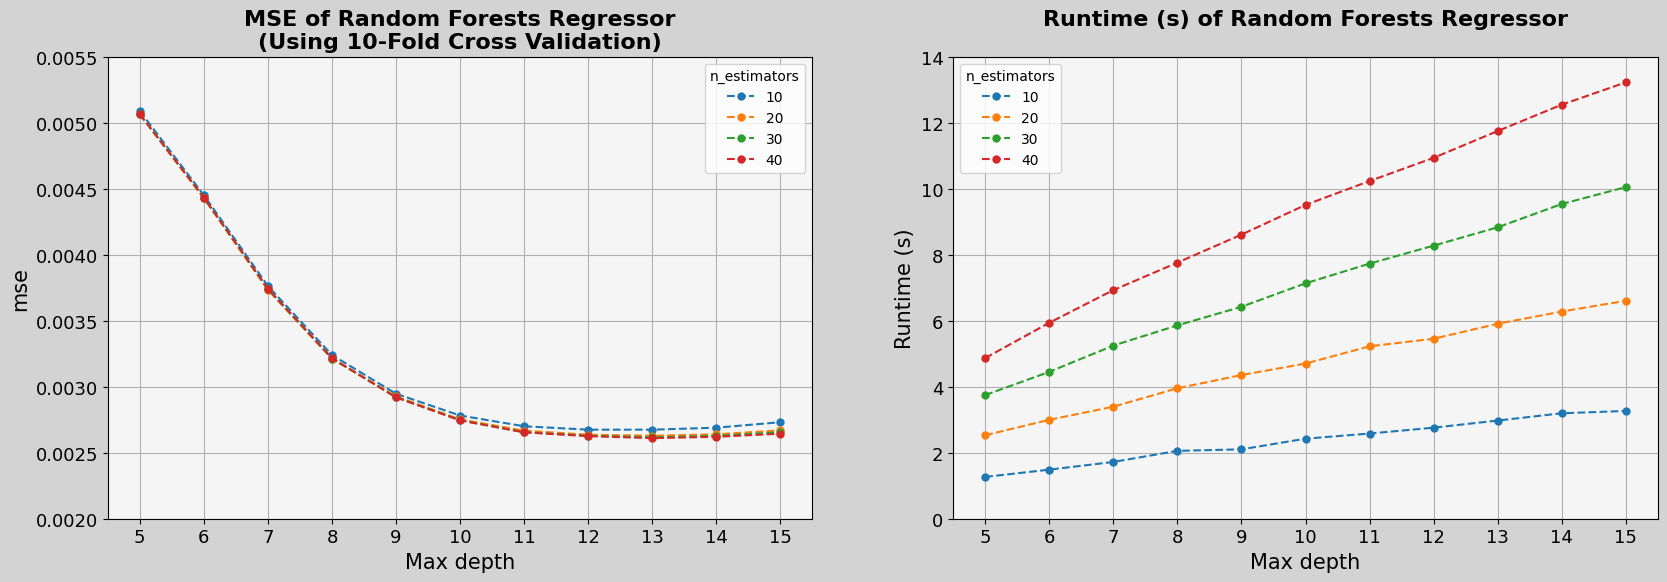

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
axs = axs.flatten()
fig.set_facecolor('lightgrey')

# ACCURACY
axs[0].set_title('MSE of Random Forests Regressor\n(Using 10-Fold Cross Validation)',
             fontsize = 16, weight = 'bold')
axs[0].set_facecolor('whitesmoke')
sns.lineplot(data = Report_rf_df, x = 'max_depth', y = 'mse',
             hue = 'n_estimators', palette='tab10',
             linewidth = 1.5, linestyle = '--', marker = 'o',
             markeredgecolor='none', markersize = 6, ax = axs[0])
axs[0].set_ylabel('mse', fontsize = 15)
axs[0].set_xlabel('Max depth', fontsize = 15)
# ax.axvline(x = 8, ls = '--', color = 'black')
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_yticks(axs[0].get_yticks())
axs[0].set_xticklabels([label.get_text() for label in axs[0].get_xticklabels()], fontsize = 13)
axs[0].set_yticklabels([label.get_text() for label in axs[0].get_yticklabels()], fontsize = 13)
axs[0].grid()

# DURATION
axs[1].set_title('Runtime (s) of Random Forests Regressor\n',
                 fontsize = 16, weight = 'bold')
axs[1].set_facecolor('whitesmoke')
sns.lineplot(data = Report_rf_df, x = 'max_depth', y = 'duration',
             hue = 'n_estimators', palette='tab10',
             linewidth = 1.5, linestyle = '--', marker = 'o',
             markeredgecolor='none', markersize = 6, ax = axs[1])
axs[1].set_ylabel('Runtime (s)', fontsize = 15)
axs[1].set_xlabel('Max depth', fontsize = 15)
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_xticklabels([label.get_text() for label in axs[1].get_xticklabels()], fontsize = 13)
axs[1].set_yticklabels([label.get_text() for label in axs[1].get_yticklabels()], fontsize = 13)
axs[1].grid()

plt.show()

In [ ]:
Report_rf_df[Report_rf_df['mse'] == np.min(Report_rf_df['mse'])]

,max_depth,n_estimators,mse,duration
41,13,40,0.00261,11.747843


####**WITH FEATURE SELECTION**

In [ ]:
def KFOLD_RF_FS(x_train, y_train, max_depth, n_estimators):
  # Initial list
  mse_list = []
  r2_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
  fold = 0
  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Construct Random Forests method
    start = time.time()
    rf_reg = RandomForestRegressor(n_estimators = n_estimators,
                                    max_depth = max_depth,
                                    random_state=42)
    rf_reg = rf_reg.fit(x_est, y_est)
    end = time.time()

    duration_list.append(end - start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                       y_pred = rf_reg.predict(x_val)))
    r2_list.append(r2_score(y_true = y_val,
                            y_pred = rf_reg.predict(x_val)))
    fold += 1

  return np.mean(mse_list), np.mean(r2_list), np.mean(duration_list)

In [ ]:
NEST = [10, 20, 30, 40]
MDEP = list(np.arange(5, 16, 1))
Report_rf_fs = {'Selection':[], 'max_depth':[], 'n_estimators':[], 'mse':[], 'r2':[], 'duration':[]}
for fs in FS:
  if fs == 'selected features':
    x_train__ = x_train_selected

  elif fs == 'All features':
    x_train__ = x_train
  for n in NEST:
    for m in MDEP:
      Report_rf_fs['Selection'].append(fs)
      Report_rf_fs['max_depth'].append(m)
      Report_rf_fs['n_estimators'].append(n)
      RF_output = KFOLD_RF_FS(x_train__, y_train,
                          max_depth = m,
                          n_estimators = n)
      Report_rf_fs['mse'].append(RF_output[0])
      Report_rf_fs['r2'].append(RF_output[1])
      Report_rf_fs['duration'].append(RF_output[2])

In [ ]:
Report_rf_fs = pd.DataFrame(Report_rf_fs)
Report_rf_fs

,Selection,max_depth,n_estimators,mse,r2,duration
0,selected_features,5,10,0.005089,0.771312,1.191455
1,selected_features,6,10,0.004451,0.800001,1.378173
2,selected_features,7,10,0.003763,0.830888,1.602045
3,selected_features,8,10,0.003240,0.854393,2.657506
4,selected_features,9,10,0.002947,0.867566,2.022099
...,...,...,...,...,...,...
83,All_features,11,40,0.002654,0.880727,9.408429
84,All_features,12,40,0.002626,0.882003,10.060965
85,All_features,13,40,0.002610,0.882688,10.766256
86,All_features,14,40,0.002621,0.882229,11.640591


In [ ]:
print('Best model with Selected Features:')
Report_rf_fs[
    (Report_rf_fs['Selection'] == 'selected_features') &
    (Report_rf_fs['mse'] == Report_rf_fs.loc[Report_rf_fs['Selection'] == 'selected_features', 'mse'].min())
]

Best model with Selected Features:


,Selection,max_depth,n_estimators,mse,r2,duration
41,selected_features,13,40,0.00261,0.882688,10.903584


In [ ]:
print('Best model with All Features:')
Report_rf_fs[
    (Report_rf_fs['Selection'] == 'All_features') &
    (Report_rf_fs['mse'] == Report_rf_fs.loc[Report_rf_fs['Selection'] == 'All_features', 'mse'].min())
]

Best model with All Features:


,Selection,max_depth,n_estimators,mse,r2,duration
85,All_features,13,40,0.00261,0.882688,10.766256


In [ ]:
Report_rf_fs.to_csv('/content/drive/MyDrive/Report_rf_regression_fs.csv')

### **BAGGING**

**IMPORT REQUIRED MODULES**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
def KFOLD_DTBAG(x_train, y_train, max_depth, n_estimators):
  # Initial list
  mse_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Construct Decision Tree Classifier with Bagging method
    start = time.time()
    base_dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt_bag = BaggingRegressor(estimator=base_dt, n_estimators=n_estimators, random_state=42)
    dt_bag = dt_bag.fit(x_est, y_est)
    end = time.time()

    duration_list.append(end-start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                       y_pred = dt_bag.predict(x_val)))

  return np.mean(mse_list), np.mean(duration_list)

In [ ]:
NEST = [10, 20, 30, 40]
MDEP = list(np.arange(5, 16, 1))
Report_dt_bag = {'max_depth':[], 'n_estimators':[], 'mse':[], 'duration':[]}
for n in NEST:
  for m in MDEP:
    Report_dt_bag['max_depth'].append(m)
    Report_dt_bag['n_estimators'].append(n)
    DTBAG_output = KFOLD_DTBAG(x_train, y_train,
                               max_depth = m,
                               n_estimators = n)
    Report_dt_bag['mse'].append(DTBAG_output[0])
    Report_dt_bag['duration'].append(DTBAG_output[1])

In [ ]:
Report_dt_bag_df = pd.DataFrame(Report_dt_bag)
Report_dt_bag_df['n_estimators'] = Report_dt_bag_df['n_estimators'].astype(str)
Report_dt_bag_df['max_depth'] = Report_dt_bag_df['max_depth'].astype(str)
Report_dt_bag_df

,max_depth,n_estimators,mse,duration
0,5,10,0.005089,1.297593
1,6,10,0.004451,1.521685
2,7,10,0.003763,1.730496
3,8,10,0.003239,2.085753
4,9,10,0.002951,2.117960
5,10,10,0.002785,2.464187
6,11,10,0.002700,2.622823
7,12,10,0.002674,2.764360
8,13,10,0.002671,2.990911
9,14,10,0.002695,3.141452


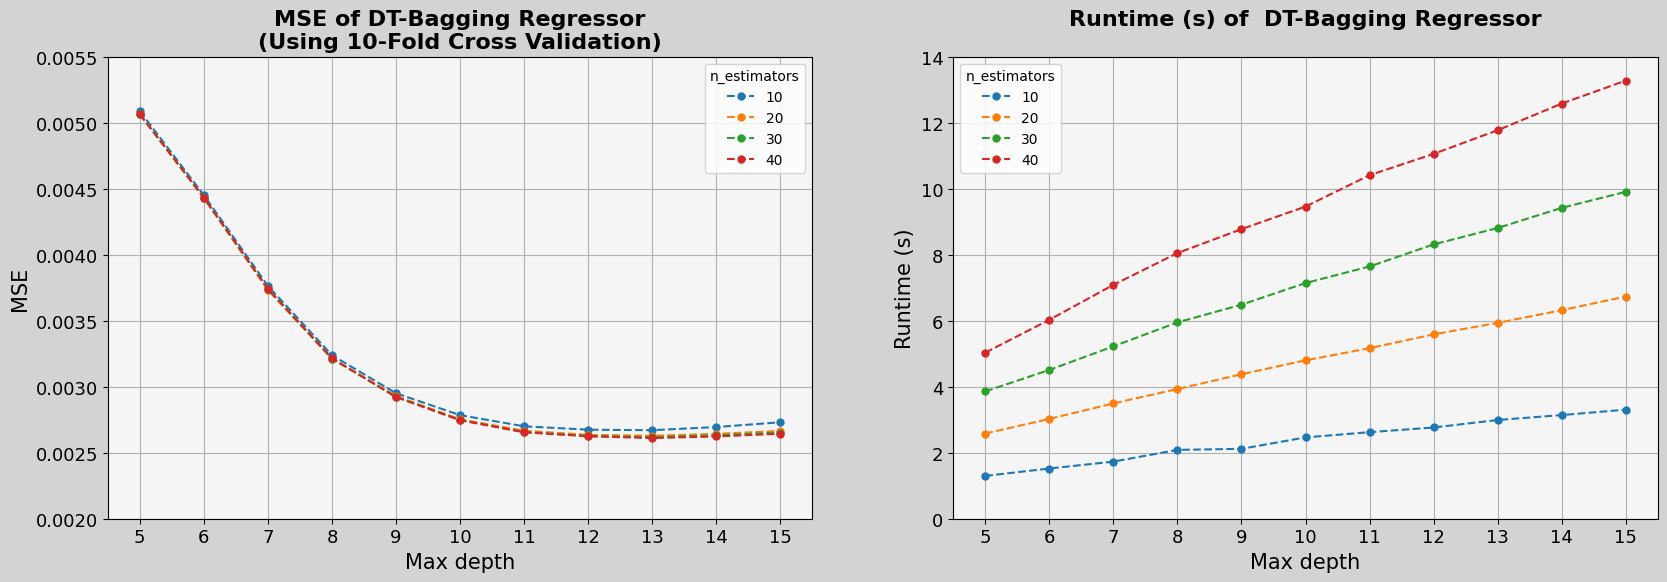

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
axs = axs.flatten()
fig.set_facecolor('lightgrey')

axs[0].set_title('MSE of DT-Bagging Regressor\n(Using 10-Fold Cross Validation)',
             fontsize = 16, weight = 'bold')
axs[0].set_facecolor('whitesmoke')
sns.lineplot(data = Report_dt_bag_df, x = 'max_depth', y = 'mse',
             hue = 'n_estimators', palette='tab10', linewidth = 1.5,
             linestyle = '--', marker = 'o', markeredgecolor='none',
             markersize = 6, ax = axs[0])
axs[0].set_ylabel('MSE', fontsize = 15)
axs[0].set_xlabel('Max depth', fontsize = 15)
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_yticks(axs[0].get_yticks())
axs[0].set_xticklabels([label.get_text() for label in axs[0].get_xticklabels()], fontsize = 13)
axs[0].set_yticklabels([label.get_text() for label in axs[0].get_yticklabels()], fontsize = 13)
axs[0].grid()

# DURATION
axs[1].set_title('Runtime (s) of  DT-Bagging Regressor\n',
                 fontsize = 16, weight = 'bold')
axs[1].set_facecolor('whitesmoke')
sns.lineplot(data = Report_dt_bag_df, x = 'max_depth', y = 'duration',
             hue = 'n_estimators', palette='tab10',
             linewidth = 1.5, linestyle = '--', marker = 'o',
             markeredgecolor='none', markersize = 6, ax = axs[1])
axs[1].set_ylabel('Runtime (s)', fontsize = 15)
axs[1].set_xlabel('Max depth', fontsize = 15)
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_xticklabels([label.get_text() for label in axs[1].get_xticklabels()], fontsize = 13)
axs[1].set_yticklabels([label.get_text() for label in axs[1].get_yticklabels()], fontsize = 13)
axs[1].grid()

plt.show()

####**WITH FEATURE SELECTION**

In [ ]:
def KFOLD_DTBAG_FS(x_train, y_train, max_depth, n_estimators):
  # Initial list
  mse_list = []
  r2_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Construct Decision Tree Classifier with Bagging method
    start = time.time()
    base_dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt_bag = BaggingRegressor(estimator=base_dt, n_estimators=n_estimators, random_state=42)
    dt_bag = dt_bag.fit(x_est, y_est)
    end = time.time()

    duration_list.append(end-start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                       y_pred = dt_bag.predict(x_val)))
    r2_list.append(r2_score(y_true = y_val,
                            y_pred = dt_bag.predict(x_val)))

  return np.mean(mse_list), np.mean(r2_list), np.mean(duration_list)

In [ ]:
NEST = [10, 20, 30, 40]
MDEP = list(np.arange(5, 16, 1))
Report_dt_bag_fs = {'Selection':[], 'max_depth':[], 'n_estimators':[], 'mse':[], 'r2':[], 'duration':[]}
for fs in FS:
  if fs == 'selected features':
    x_train__ = x_train_selected

  elif fs == 'All features':
    x_train__ = x_train
  for n in NEST:
    for m in MDEP:
      Report_dt_bag_fs['Selection'].append(fs)
      Report_dt_bag_fs['max_depth'].append(m)
      Report_dt_bag_fs['n_estimators'].append(n)
      DTBAG_output = KFOLD_DTBAG_FS(x_train__, y_train,
                                max_depth = m,
                                n_estimators = n)
      Report_dt_bag_fs['mse'].append(DTBAG_output[0])
      Report_dt_bag_fs['r2'].append(DTBAG_output[1])
      Report_dt_bag_fs['duration'].append(DTBAG_output[2])

In [ ]:
Report_dt_bag_fs = pd.DataFrame(Report_dt_bag_fs)
Report_dt_bag_fs

,Selection,max_depth,n_estimators,mse,r2,duration
0,selected_features,5,10,0.005019,0.774582,1.463434
1,selected_features,6,10,0.004417,0.801650,2.690501
2,selected_features,7,10,0.003736,0.832237,1.496905
3,selected_features,8,10,0.003221,0.855400,1.738520
4,selected_features,9,10,0.002930,0.868432,1.618617
...,...,...,...,...,...,...
83,All_features,11,40,0.002663,0.880433,8.511085
84,All_features,12,40,0.002631,0.881853,9.274043
85,All_features,13,40,0.002629,0.881915,9.773521
86,All_features,14,40,0.002646,0.881145,10.330817


In [ ]:
print('Best model with Selected Features:')
Report_dt_bag_fs[
    (Report_dt_bag_fs['Selection'] == 'selected_features') &
    (Report_dt_bag_fs['mse'] == Report_dt_bag_fs.loc[Report_dt_bag_fs['Selection'] == 'selected_features', 'mse'].min())
]

Best model with Selected Features:


,Selection,max_depth,n_estimators,mse,r2,duration
41,selected_features,13,40,0.002629,0.881915,11.471974


In [ ]:
print('Best model with All Features:')
Report_dt_bag_fs[
    (Report_dt_bag_fs['Selection'] == 'All_features') &
    (Report_dt_bag_fs['mse'] == Report_dt_bag_fs.loc[Report_dt_bag_fs['Selection'] == 'All_features', 'mse'].min())
]

Best model with All Features:


,Selection,max_depth,n_estimators,mse,r2,duration
85,All_features,13,40,0.002629,0.881915,9.773521


In [ ]:
Report_dt_bag_fs.to_csv('/content/drive/MyDrive/Report_dt_bag_regression_fs.csv')

### **GRADIENT BOOST**

**IMPORT REQUIRED MODULES**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
NEST = [10, 50, 100]
MDEP = [1,2]
LR = [0.6, 0.5, 0.1, 0.05]
Report_gb = {'max_depth':[], 'n_estimators':[], 'learning_rate': [], 'mse':[], 'duration':[]}
for lr in LR:
  for n in NEST:
    for m in MDEP:
      Report_gb['max_depth'].append(m)
      Report_gb['n_estimators'].append(n)
      Report_gb['learning_rate'].append(lr)
      GB_output = KFOLD_GB(x_train, y_train,
                           max_depth = m,
                           n_estimators = n,
                           learning_rate = lr)
      Report_gb['mse'].append(GB_output[0])
      Report_gb['duration'].append(GB_output[1])

In [ ]:
def KFOLD_GB(x_train, y_train, max_depth, n_estimators, learning_rate):
  # Initial list
  mse_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Construct Random Forests method
    start = time.time()
    gb_reg = GradientBoostingRegressor(n_estimators = n_estimators,
                                       max_depth = max_depth,
                                       learning_rate = learning_rate,
                                       random_state=42)
    gb_reg = gb_reg.fit(x_est, y_est)
    end = time.time()

    duration_list.append(end - start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                        y_pred = gb_reg.predict(x_val)))

  return np.mean(mse_list), np.mean(duration_list)

In [ ]:
Report_gb_df = pd.DataFrame(Report_gb)
Report_gb_df['n_estimators'] = Report_gb_df['n_estimators'].astype(str)
Report_gb_df['max_depth'] = Report_gb_df['max_depth'].astype(str)
Report_gb_df

,max_depth,n_estimators,learning_rate,mse,duration
0,1,10,0.60,0.006025,0.450660
1,2,10,0.60,0.004175,0.720874
2,1,50,0.60,0.004338,1.885811
3,2,50,0.60,0.003120,3.758288
4,1,100,0.60,0.004001,3.787315
5,2,100,0.60,0.002894,7.416242
6,1,10,0.50,0.006402,0.347099
7,2,10,0.50,0.004326,0.708529
8,1,50,0.50,0.004404,1.968215
9,2,50,0.50,0.003161,3.628763


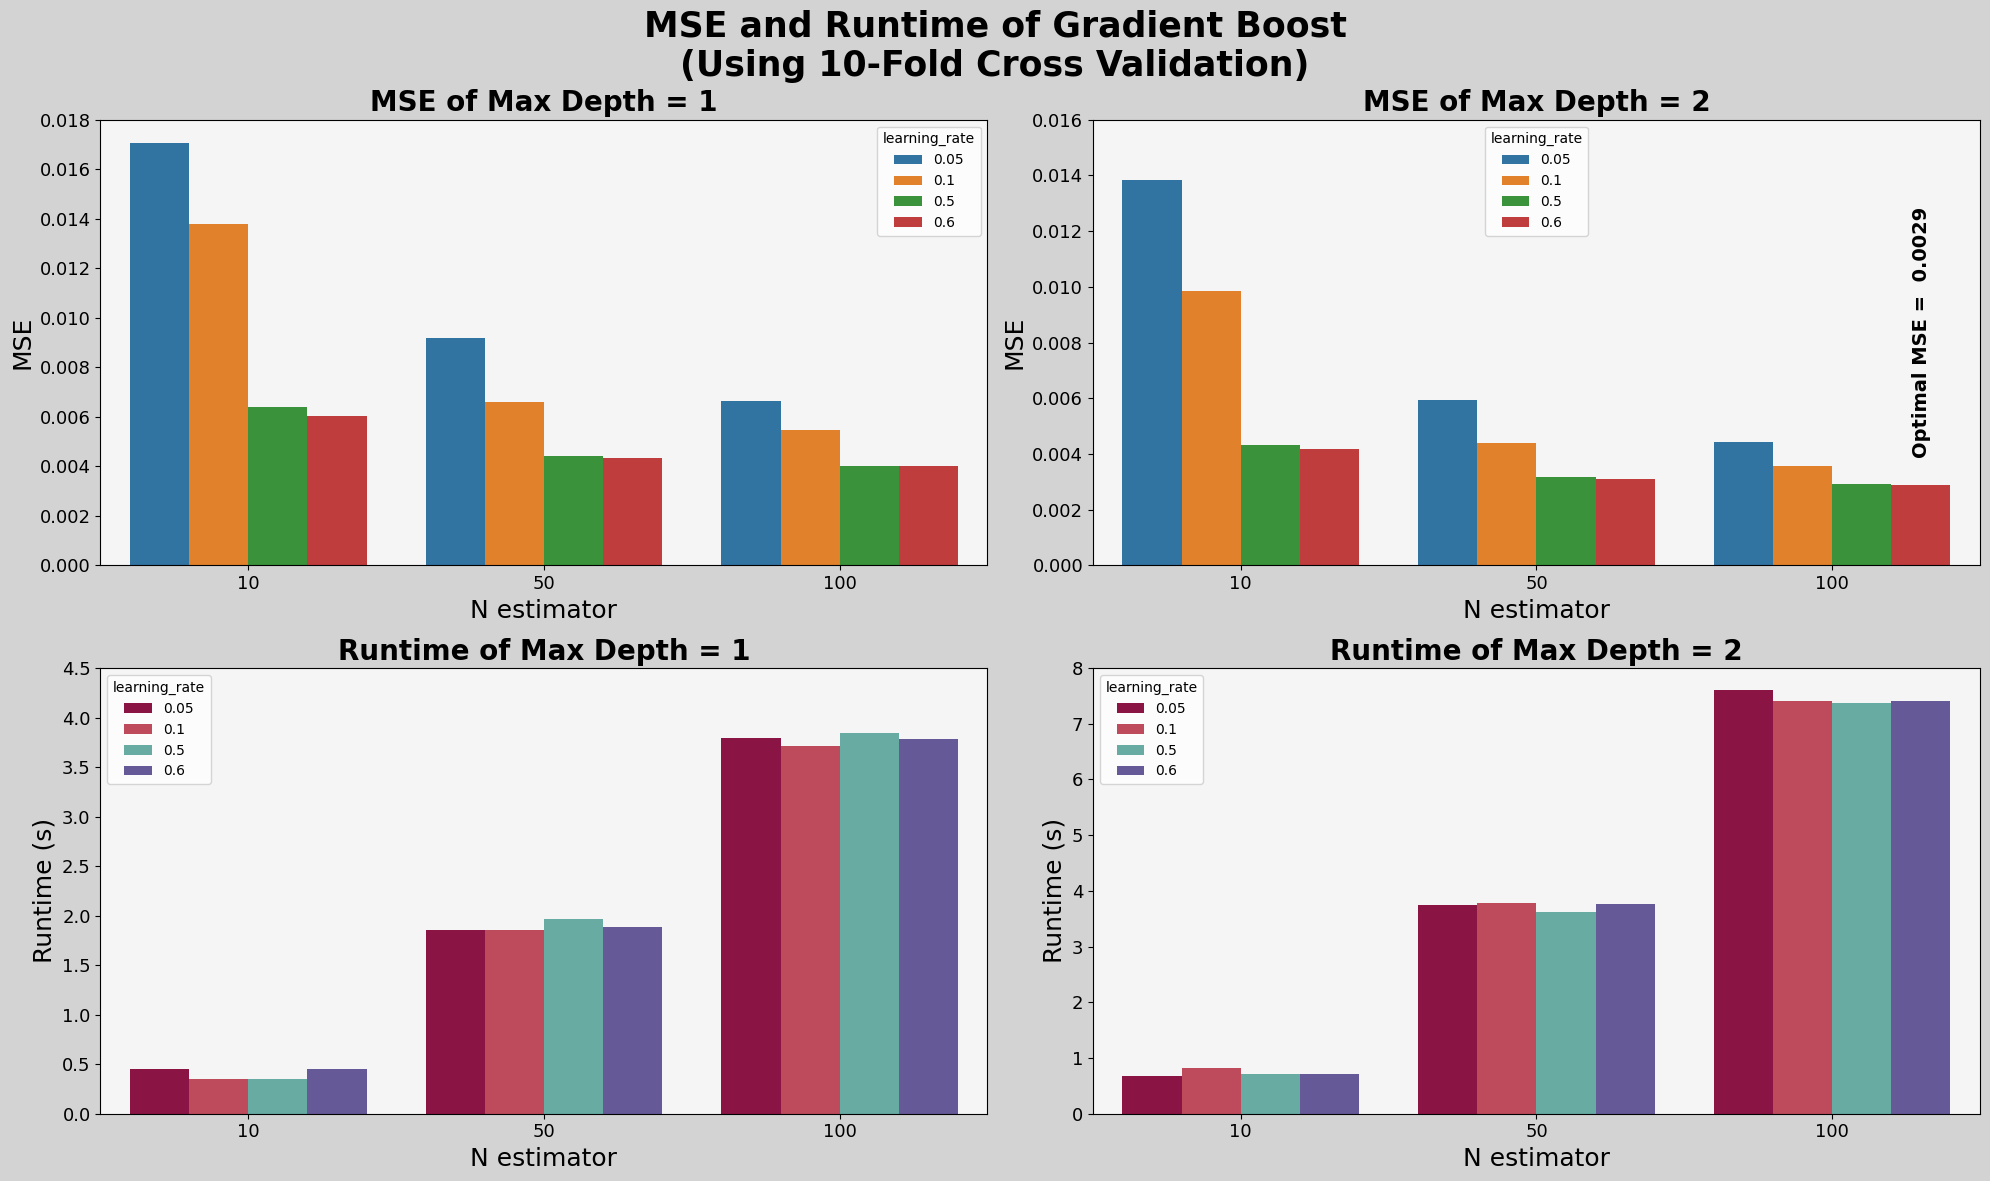

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (20, 12))
axs = axs.flatten()
fig.set_facecolor('lightgrey')
fig.suptitle('MSE and Runtime of Gradient Boost\n(Using 10-Fold Cross Validation)', fontsize = 25, weight = 'bold')

# Max depth = 1
## MSE
axs[0].set_title('MSE of Max Depth = 1',
             fontsize = 20, weight = 'bold')
axs[0].set_facecolor('whitesmoke')
sns.barplot(data = Report_gb_df[Report_gb_df['max_depth'] == '1'], x = 'n_estimators',
            y = 'mse', hue = 'learning_rate', palette='tab10', ax = axs[0])
axs[0].set_ylabel('MSE', fontsize = 18)
axs[0].set_xlabel('N estimator', fontsize = 18)
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_yticks(axs[0].get_yticks())
axs[0].set_xticklabels([label.get_text() for label in axs[0].get_xticklabels()], fontsize = 13)
axs[0].set_yticklabels([label.get_text() for label in axs[0].get_yticklabels()], fontsize = 13)
# axs[0].set_ylim(0, 1)

## Duration
axs[2].set_title('Runtime of Max Depth = 1',
             fontsize = 20, weight = 'bold')
axs[2].set_facecolor('whitesmoke')
sns.barplot(data = Report_gb_df[Report_gb_df['max_depth'] == '1'], x = 'n_estimators',
            y = 'duration', hue = 'learning_rate', palette='Spectral', ax = axs[2])
axs[2].set_ylabel('Runtime (s)', fontsize = 18)
axs[2].set_xlabel('N estimator', fontsize = 18)
axs[2].set_xticks(axs[2].get_xticks())
axs[2].set_yticks(axs[2].get_yticks())
axs[2].set_xticklabels([label.get_text() for label in axs[2].get_xticklabels()], fontsize = 13)
axs[2].set_yticklabels([label.get_text() for label in axs[2].get_yticklabels()], fontsize = 13)


# Max depth = 2
## MSE
axs[1].set_title('MSE of Max Depth = 2',
             fontsize = 20, weight = 'bold')
axs[1].set_facecolor('whitesmoke')
sns.barplot(data = Report_gb_df[Report_gb_df['max_depth'] == '2'], x = 'n_estimators',
            y = 'mse', hue = 'learning_rate', palette='tab10', ax = axs[1])
axs[1].set_ylabel('MSE', fontsize = 18)
axs[1].set_xlabel('N estimator', fontsize = 18)
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_xticklabels([label.get_text() for label in axs[1].get_xticklabels()], fontsize = 13)
axs[1].set_yticklabels([label.get_text() for label in axs[1].get_yticklabels()], fontsize = 13)
axs[1].text(x = 2.27, y = 0.004,
            s = f'Optimal MSE = {Report_gb_df[Report_gb_df.mse == np.min(Report_gb_df.mse)].iloc[0, 3]: .4f}',
            rotation = 90, fontsize = 14, weight = 'semibold', color = 'black')
# axs[1].set_ylim(0, 1)

## Duration
axs[3].set_title('Runtime of Max Depth = 2',
             fontsize = 20, weight = 'bold')
axs[3].set_facecolor('whitesmoke')
sns.barplot(data = Report_gb_df[Report_gb_df['max_depth'] == '2'], x = 'n_estimators',
            y = 'duration', hue = 'learning_rate', palette='Spectral', ax = axs[3])
axs[3].set_ylabel('Runtime (s)', fontsize = 18)
axs[3].set_xlabel('N estimator', fontsize = 18)
axs[3].set_xticks(axs[3].get_xticks())
axs[3].set_yticks(axs[3].get_yticks())
axs[3].set_xticklabels([label.get_text() for label in axs[3].get_xticklabels()], fontsize = 13)
axs[3].set_yticklabels([label.get_text() for label in axs[3].get_yticklabels()], fontsize = 13)

plt.tight_layout()
plt.show()

In [ ]:
Report_gb_df[Report_gb_df.mse == np.min(Report_gb_df.mse)]

,max_depth,n_estimators,learning_rate,mse,duration
5,2,100,0.6,0.002894,7.416242


####**WITH FEATURE SELECTION**

In [ ]:
def KFOLD_GB_FS(x_train, y_train, max_depth, n_estimators, learning_rate):
  # Initial list
  mse_list = []
  r2_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Construct Random Forests method
    start = time.time()
    gb_reg = GradientBoostingRegressor(n_estimators = n_estimators,
                                       max_depth = max_depth,
                                       learning_rate = learning_rate,
                                       random_state=42)
    gb_reg = gb_reg.fit(x_est, y_est)
    end = time.time()

    duration_list.append(end - start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                        y_pred = gb_reg.predict(x_val)))
    r2_list.append(r2_score(y_true = y_val,
                            y_pred = gb_reg.predict(x_val)))

  return np.mean(mse_list), np.mean(r2_list), np.mean(duration_list)

In [ ]:
NEST = [10, 50, 100]
MDEP = [1,2]
LR = [0.6, 0.5, 0.1, 0.05]
Report_gb_fs = {'Selection':[],'max_depth':[], 'n_estimators':[], 'learning_rate': [], 'mse':[], 'r2':[], 'duration':[]}
for fs in FS:
  if fs == 'selected features':
    x_train__ = x_train_selected

  elif fs == 'All features':
    x_train__ = x_train
  for lr in LR:
    for n in NEST:
      for m in MDEP:
        Report_gb_fs['Selection'].append(fs)
        Report_gb_fs['max_depth'].append(m)
        Report_gb_fs['n_estimators'].append(n)
        Report_gb_fs['learning_rate'].append(lr)
        GB_output = KFOLD_GB_FS(x_train__, y_train,
                            max_depth = m,
                            n_estimators = n,
                            learning_rate = lr)
        Report_gb_fs['mse'].append(GB_output[0])
        Report_gb_fs['r2'].append(GB_output[1])
        Report_gb_fs['duration'].append(GB_output[2])

In [ ]:
Report_gb_fs = pd.DataFrame(Report_gb_fs)
Report_gb_fs

,Selection,max_depth,n_estimators,learning_rate,mse,r2,duration
0,selected_features,1,10,0.60,0.006023,0.729542,0.587427
1,selected_features,2,10,0.60,0.004144,0.813959,1.951282
2,selected_features,1,50,0.60,0.004324,0.805847,1.854840
3,selected_features,2,50,0.60,0.003085,0.861491,3.211613
4,selected_features,1,100,0.60,0.003994,0.820657,3.347425
5,selected_features,2,100,0.60,0.002887,0.870354,6.372725
6,selected_features,1,10,0.50,0.006401,0.712617,0.295718
7,selected_features,2,10,0.50,0.004371,0.803745,0.572345
8,selected_features,1,50,0.50,0.004405,0.802232,1.949262
9,selected_features,2,50,0.50,0.003134,0.859282,3.241217


In [ ]:
print('Best model with Selected Features:')
Report_gb_fs[
    (Report_gb_fs['Selection'] == 'selected_features') &
    (Report_gb_fs['mse'] == Report_gb_fs.loc[Report_gb_fs['Selection'] == 'selected_features', 'mse'].min())
]

Best model with Selected Features:


,Selection,max_depth,n_estimators,learning_rate,mse,r2,duration
5,selected_features,2,100,0.6,0.002887,0.870354,6.372725


In [ ]:
print('Best model with All Features:')
Report_gb_fs[
    (Report_gb_fs['Selection'] == 'All_features') &
    (Report_gb_fs['mse'] == Report_gb_fs.loc[Report_gb_fs['Selection'] == 'All_features', 'mse'].min())
]

Best model with All Features:


,Selection,max_depth,n_estimators,learning_rate,mse,r2,duration
29,All_features,2,100,0.6,0.002887,0.870354,6.308819


In [ ]:
Report_gb_fs.to_csv('/content/drive/MyDrive/Report_dt_boost_regression_fs.csv')

## **SUPPORT VECTOR MACHINE**

**IMPORT REQUIRED LIBRARIES**

In [ ]:
from sklearn.svm import SVR

In [ ]:
def KFOLD_SVM(x_train, y_train, C, kernel):
  # Initial list
  mse_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Scale
    scaler = StandardScaler()
    x_est = scaler.fit_transform(x_est)
    x_val = scaler.transform(x_val)
    # Training
    svm = SVR(C = C, kernel = kernel)
    start = time.time()
    svm = svm.fit(x_est, y_est)
    end = time.time()
    duration_list.append(end - start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                        y_pred = svm.predict(x_val)))
    print(':)))')
  return np.mean(mse_list), np.mean(duration_list)

In [ ]:
def SAMPLE_SVM(x_train, y_train, iter_sample, C, kernel):
  # List of mse and durations
  MSE_LIST, DUR_LIST = [], []
  # Sampling in iterations
  list_index = list(range(len(x_train)))
  np.random.seed(42)
  for i in range(iter_sample):
    # sample 5000 obs.
    sampled_index = np.random.choice(list_index, 5000, replace = False).tolist()
    x_train_sample = x_train.iloc[sampled_index]
    y_train_sample = y_train.iloc[sampled_index]
    # update indices
    list_index = list(set(list_index) - set(sampled_index))
    # Training Phase
    SVM_output = KFOLD_SVM(x_train = x_train_sample,
                           y_train = y_train_sample,
                           C = C,
                           kernel = kernel)
    MSE_LIST.append(SVM_output[0])
    DUR_LIST.append(SVM_output[1])
    print(f'============== Take Sample #{i+1} ==============')
  return np.mean(MSE_LIST), np.mean(DUR_LIST)

In [ ]:
C = np.logspace(-1, 1, 3)
Kernel = ['linear', 'poly', 'rbf']
Report_svm = {'C':[], 'kernel':[], 'mse':[], 'duration':[]}
for c in C:
  for k in Kernel:
    Report_svm['C'].append(c)
    Report_svm['kernel'].append(k)
    SVM_output = SAMPLE_SVM(x_train = x_train.iloc[:, 0:23],
                            y_train =  y_train,
                            iter_sample = 5,
                            C = c,
                            kernel = k)
    Report_svm['mse'].append(SVM_output[0])
    Report_svm['duration'].append(SVM_output[1])
    print(f"SVM (kernel = {k}; c = {c}): {Report_svm['mse'][-1]}")

:)))
:)))
:)))
:)))
:)))
============== Take Sample #1 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #2 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #3 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #4 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #5 ==============
SVM (kernel = linear; c = 0.1): 0.007062285637409458
:)))
:)))
:)))
:)))
:)))
============== Take Sample #1 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #2 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #3 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #4 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #5 ==============
SVM (kernel = poly; c = 0.1): 0.008175458006247402
:)))
:)))
:)))
:)))
:)))
============== Take Sample #1 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #2 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #3 =

In [ ]:
Report_svm_df = pd.DataFrame(Report_svm)
Report_svm_df

,C,kernel,mse,duration
0,0.1,linear,0.007062,0.463584
1,0.1,poly,0.008175,0.211442
2,0.1,rbf,0.006945,0.199562
3,1.0,linear,0.007060,1.987772
4,1.0,poly,0.007865,0.393285
5,1.0,rbf,0.006068,0.226304
6,10.0,linear,0.007060,12.625507
7,10.0,poly,0.011028,1.766204
8,10.0,rbf,0.006335,0.357720


In [ ]:
Report_svm_df.to_csv('/content/drive/MyDrive/SL-Project/CODES/xG_Report_svm.csv')

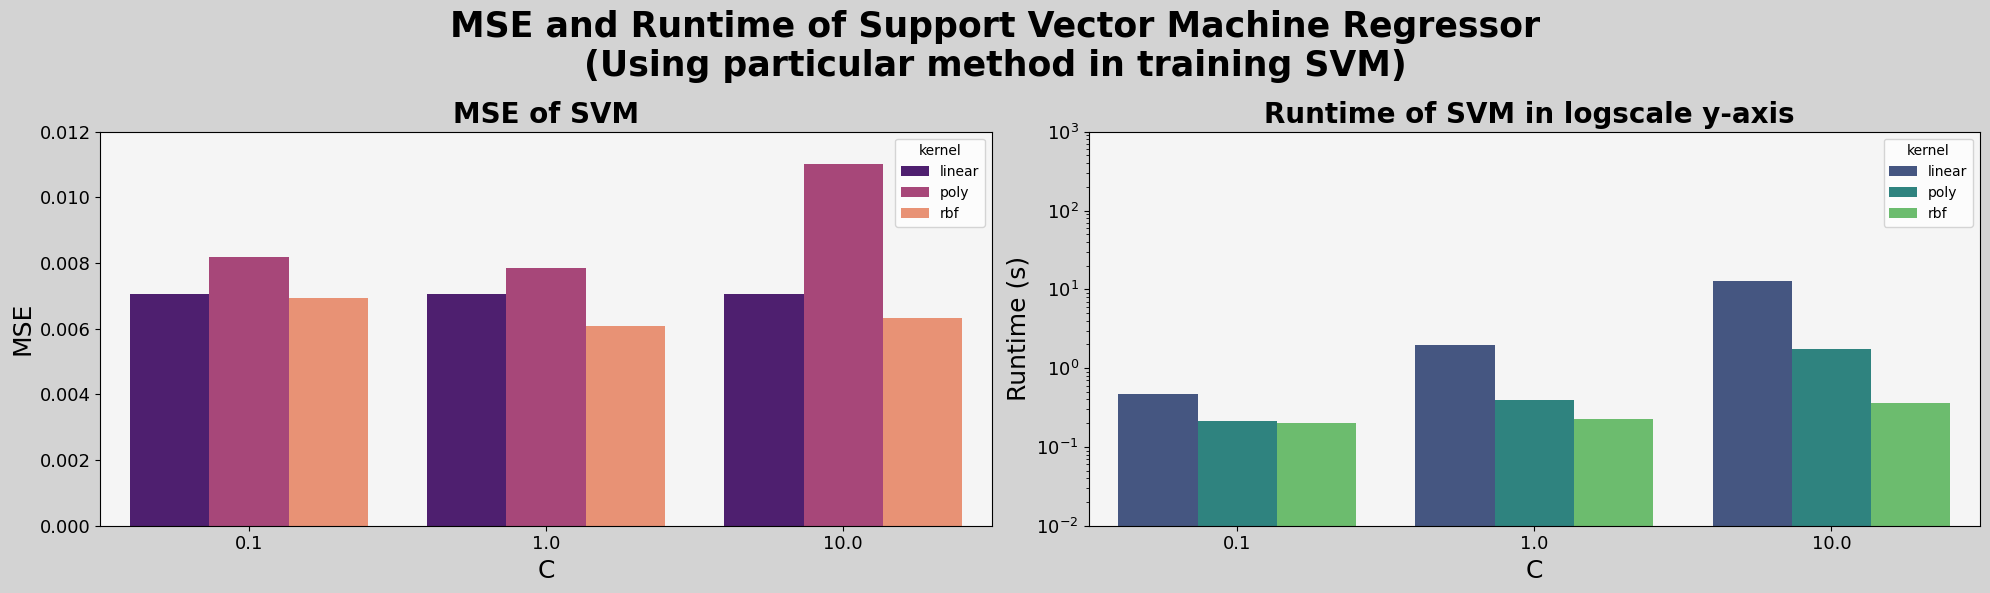

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (20, 6))
axs = axs.flatten()
fig.set_facecolor('lightgrey')
fig.suptitle('MSE and Runtime of Support Vector Machine Regressor\n(Using particular method in training SVM)', fontsize = 25, weight = 'bold')

# Max depth = 1
## Accuracy
axs[0].set_title('MSE of SVM',
             fontsize = 20, weight = 'bold')
axs[0].set_facecolor('whitesmoke')
sns.barplot(data = Report_svm_df, x = 'C',
            y = 'mse', hue = 'kernel', palette='magma', ax = axs[0])
axs[0].set_ylabel('MSE', fontsize = 18)
axs[0].set_xlabel('C', fontsize = 18)
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_yticks(axs[0].get_yticks())
axs[0].set_xticklabels([label.get_text() for label in axs[0].get_xticklabels()], fontsize = 13)
axs[0].set_yticklabels([label.get_text() for label in axs[0].get_yticklabels()], fontsize = 13)
# axs[0].set_ylim(0, 1)

## Duration
axs[1].set_title('Runtime of SVM in logscale y-axis ',
             fontsize = 20, weight = 'bold')
axs[1].set_facecolor('whitesmoke')
sns.barplot(data = Report_svm_df, x = 'C',
            y = 'duration', hue = 'kernel', palette='viridis', ax = axs[1])
axs[1].set_ylabel('Runtime (s)', fontsize = 18)
axs[1].set_xlabel('C', fontsize = 18)
axs[1].set_yscale('log')
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_xticklabels([label.get_text() for label in axs[1].get_xticklabels()], fontsize = 13)
axs[1].set_yticklabels([label.get_text() for label in axs[1].get_yticklabels()], fontsize = 13)

plt.tight_layout()
plt.show()

###**WITH FEATURE SELECTION**

In [ ]:
def KFOLD_SVM_FS(x_train, y_train, C, kernel):
  # Initial list
  mse_list = []
  r2_list = []
  duration_list = []
  # Kfold Cross Validation
  k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
  for est_idx, val_idx in k_fold.split(x_train, y_train):
    # Split the data into estimation and validation
    x_est, x_val = x_train.iloc[est_idx], x_train.iloc[val_idx]
    y_est, y_val = y_train.iloc[est_idx], y_train.iloc[val_idx]
    x_est.reset_index(drop=True, inplace=True)
    x_val.reset_index(drop=True, inplace=True)
    y_est.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    # Scale
    scaler = StandardScaler()
    x_est = scaler.fit_transform(x_est)
    x_val = scaler.transform(x_val)
    # Training
    svm = SVR(C = C, kernel = kernel)
    start = time.time()
    svm = svm.fit(x_est, y_est)
    end = time.time()
    duration_list.append(end - start)
    mse_list.append(mean_squared_error(y_true = y_val,
                                        y_pred = svm.predict(x_val)))
    r2_list.append(r2_score(y_true = y_val,
                                        y_pred = svm.predict(x_val)))
    print(':)))')
  return np.mean(mse_list), np.mean(r2_list), np.mean(duration_list)

In [ ]:
def SAMPLE_SVM_FS(x_train, y_train, iter_sample, C, kernel):
  # List of mse and durations
  MSE_LIST, R2_list, DUR_LIST = [], [], []
  # Sampling in iterations
  list_index = list(range(len(x_train)))
  np.random.seed(42)
  for i in range(iter_sample):
    # sample 5000 obs.
    sampled_index = np.random.choice(list_index, 5000, replace = False).tolist()
    x_train_sample = x_train.iloc[sampled_index]
    y_train_sample = y_train.iloc[sampled_index]
    # update indices
    list_index = list(set(list_index) - set(sampled_index))
    # Training Phase
    SVM_output = KFOLD_SVM_FS(x_train = x_train_sample,
                           y_train = y_train_sample,
                           C = C,
                           kernel = kernel)
    MSE_LIST.append(SVM_output[0])
    R2_list.append(SVM_output[1])
    DUR_LIST.append(SVM_output[2])
    print(f'============== Take Sample #{i+1} ==============')
  return np.mean(MSE_LIST), np.mean(R2_list), np.mean(DUR_LIST)

In [ ]:
C = np.logspace(-1, 1, 3)
Kernel = ['linear', 'poly', 'rbf']
Report_svm = {'Selection':[],'C':[], 'kernel':[], 'mse':[], 'r2':[], 'duration':[]}
FS = ['selected features', 'All features']
for fs in FS:
  if fs == 'selected features':
    x_train__ = x_train_selected
  elif fs == 'All features':
    x_train__ = x_train
  print(f'................. Selection: {fs} .................')
  for c in C:
    for k in Kernel:
      Report_svm['Selection'].append(fs)
      Report_svm['C'].append(c)
      Report_svm['kernel'].append(k)
      SVM_output = SAMPLE_SVM_FS(x_train = x_train__.iloc[:, 0:23],
                              y_train =  y_train,
                              iter_sample = 5,
                              C = c,
                              kernel = k)
      Report_svm['mse'].append(SVM_output[0])
      Report_svm['r2'].append(SVM_output[1])
      Report_svm['duration'].append(SVM_output[2])
      print(f"SVM (kernel = {k}; c = {c}): {Report_svm['mse'][-1]}")

................. Selection: selected features .................
:)))
:)))
:)))
:)))
:)))
============== Take Sample #1 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #2 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #3 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #4 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #5 ==============
SVM (kernel = linear; c = 0.1): 0.005325422054943622
:)))
:)))
:)))
:)))
:)))
============== Take Sample #1 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #2 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #3 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #4 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #5 ==============
SVM (kernel = poly; c = 0.1): 0.006961701886573586
:)))
:)))
:)))
:)))
:)))
============== Take Sample #1 ==============
:)))
:)))
:)))
:)))
:)))
============== Take Sample #2 ======

In [ ]:
Report_svm = pd.DataFrame(Report_svm)

,Selection,C,kernel,mse,r2,duration
0,selected features,0.1,linear,0.005325,0.762283,0.349865
1,selected features,0.1,poly,0.006962,0.688981,0.208336
2,selected features,0.1,rbf,0.005552,0.751976,0.188664
3,selected features,1.0,linear,0.005326,0.762233,1.054302
4,selected features,1.0,poly,0.006552,0.707262,0.462123
5,selected features,1.0,rbf,0.004677,0.790781,0.238865
6,selected features,10.0,linear,0.005329,0.762101,6.153748
7,selected features,10.0,poly,0.007298,0.674840,2.248964
8,selected features,10.0,rbf,0.005153,0.769835,0.262133
9,All features,0.1,linear,0.007062,0.685138,0.473176


In [ ]:
Report_svm['Selection'] = 9*['Forward Stepwise']+ 9 * ['All']

In [ ]:
Report_svm_fs_df = Report_svm

In [ ]:
temp1 = Report_svm_fs_df[Report_svm_fs_df.Selection == 'All']
temp1[temp1.mse == np.min(temp1.mse)]

,Selection,C,kernel,mse,r2,duration
14,All,1.0,rbf,0.006068,0.729391,0.242074


In [ ]:
temp2 = Report_svm_fs_df[Report_svm_fs_df.Selection == 'Forward Stepwise']
temp2[temp2.mse == np.min(temp2.mse)]

,Selection,C,kernel,mse,r2,duration
5,Forward Stepwise,1.0,rbf,0.004677,0.790781,0.238865


In [ ]:
Report_svm.to_csv('/content/drive/MyDrive/xG_Report_svm.csv')

# **FINAL RESULTS**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train_all, x_test_all = x_train, x_test
x_train_fss, x_test_fss = x_train.loc[:, FSS_FEATURES], x_test.loc[:, FSS_FEATURES]

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_all_scaled = pd.DataFrame(scaler.fit_transform(x_train_all), columns=list(x_train_all.columns))
x_test_all_scaled = pd.DataFrame(scaler.transform(x_test_all), columns=list(x_test_all.columns))
x_train_fss_scaled = pd.DataFrame(scaler.fit_transform(x_train_fss), columns=list(x_train_fss.columns))
x_test_fss_scaled = pd.DataFrame(scaler.transform(x_test_fss), columns=list(x_test_fss.columns))

##**OUT OF BOUNDS METRIC**

In [ ]:
def calc_out_of_bounds(y_pred):
    out_of_bounds = np.sum((y_pred < 0) | (y_pred > 1))
    percentage = (out_of_bounds / len(y_pred)) * 100
    return percentage

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors = 18)
model.fit(x_train_fss_scaled, y_train)
y_pred = model.predict(x_test_fss_scaled)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.0029281789187318753
r2 = 0.8691576976101633
oob = 0.0



## **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
x_test_fss_scaled_poly, x_train_fss_scaled_poly = poly.fit_transform(x_test_fss_scaled), poly.fit_transform(x_train_fss_scaled)
model = LinearRegression(fit_intercept=True)
model.fit(x_train_fss_scaled_poly, y_train)
y_pred = model.predict(x_test_fss_scaled_poly)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.003233075513041853
r2 = 0.8555337444646995
oob = 3.94351644566902



## **RIDGE - LASSO - ELASTIC NET**

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### **RIDGE**

In [ ]:
model = Ridge(alpha = 1, fit_intercept=True)
model.fit(x_train_all_scaled, y_train)
y_pred = model.predict(x_test_all_scaled)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.004430738666108997
r2 = 0.8020175459044553
oob = 8.880087251018885



### **LASSO**

In [ ]:
model = Lasso(alpha = 0.00001, fit_intercept=True)
model.fit(x_train_fss_scaled, y_train)
y_pred = model.predict(x_test_fss_scaled)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.0044825404421837
r2 = 0.7997028432043783
oob = 8.707881292692727



### **ELASTIC NET**

In [ ]:
model = ElasticNet(alpha = 0.00001, l1_ratio = 0.5, fit_intercept=True)
model.fit(x_train_fss_scaled, y_train)
y_pred = model.predict(x_test_fss_scaled)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.004482508526967492
r2 = 0.7997042692990556
oob = 8.707881292692727



## **GAM**

In [ ]:
from patsy import dmatrix

In [ ]:
df = 9
x_train_all_scaled_gam = pd.concat([
            dmatrix(f"bs(x_train_all_scaled.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_train_all_scaled.goal_distance": x_train_all_scaled.goal_distance}, return_type='dataframe'),
            dmatrix(f"bs(x_train_all_scaled.angle, df={df}, degree=3, include_intercept=False)", {"x_train_all_scaled.angle": x_train_all_scaled.angle}, return_type='dataframe'),
            dmatrix(f"bs(x_train_all_scaled.teammates_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_train_all_scaled.teammates_in_triangle": x_train_all_scaled.teammates_in_triangle}, return_type='dataframe'),
            dmatrix(f"bs(x_train_all_scaled.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_train_all_scaled.opponents_in_triangle": x_train_all_scaled.opponents_in_triangle}, return_type='dataframe'),
            x_train_all_scaled.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1)
        ], axis = 1)

x_test_all_scaled_gam =  pd.concat([
            dmatrix(f"bs(x_test_all_scaled.goal_distance, df={df}, degree=3, include_intercept=False)", {"x_test_all_scaled.goal_distance": x_test_all_scaled.goal_distance}, return_type='dataframe'),
            dmatrix(f"bs(x_test_all_scaled.angle, df={df}, degree=3, include_intercept=False)", {"x_test_all_scaled.angle": x_test_all_scaled.angle}, return_type='dataframe'),
            dmatrix(f"bs(x_test_all_scaled.teammates_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_test_all_scaled.teammates_in_triangle": x_test_all_scaled.teammates_in_triangle}, return_type='dataframe'),
            dmatrix(f"bs(x_test_all_scaled.opponents_in_triangle, df={df}, degree=3, include_intercept=False)", {"x_test_all_scaled.opponents_in_triangle": x_test_all_scaled.opponents_in_triangle}, return_type='dataframe'),
            x_test_all_scaled.drop(['goal_distance','angle','teammates_in_triangle','opponents_in_triangle'], axis = 1)
        ], axis = 1)

y_train.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)

model = sm.OLS(y_train, sm.add_constant(x_train_all_scaled_gam)).fit()
y_pred = model.predict(sm.add_constant(x_test_all_scaled_gam))

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')



mse = 0.0038341628074419092
r2 = 0.8286748510297857
oob = 9.878881809310602



## **DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(max_leaf_nodes= 190, random_state = 42)
model.fit(x_train_fss, y_train)
y_pred = model.predict(x_test_fss)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.0030686351550134436
r2 = 0.8628815724654435
oob = 0.0



## **RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators = 40, max_depth = 13, random_state=42)
model.fit(x_train_fss, y_train)
y_pred = model.predict(x_test_fss)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.0027277712657967543
r2 = 0.8781126827577002
oob = 0.0



## **BAGGING REGRESSOR**




In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
model = BaggingRegressor(estimator = DecisionTreeRegressor(max_depth=13), n_estimators=40, random_state=42)
model.fit(x_train_fss, y_train)
y_pred = model.predict(x_test_fss)

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.0027268220765218963
r2 = 0.8781550961871978
oob = 0.0



## **GRADIENT BOOSTING REGRESSOR**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 2, learning_rate = 0.6, random_state=42)
model.fit(x_train_fss, y_train)
y_pred = model.predict(x_test_fss)


print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.0030454691701733054
r2 = 0.8639167178160987
oob = 1.6474370013202455



## **SVR**

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(C = 1, kernel = 'rbf')
model.fit(x_train_fss_scaled, y_train)
y_pred = model.predict(x_test_fss_scaled)


print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred)}
r2 = {r2_score(y_true=y_test, y_pred = y_pred)}
oob = {calc_out_of_bounds(y_pred = y_pred)}
''')


mse = 0.0042687377678565196
r2 = 0.8092563694548125
oob = 9.000631421847196



## **MLP**

In [ ]:
y_pred = TRAIN_MLP(X = x.loc[:, FSS_FEATURES],
                   Y = y,
                   input_size = 15,
                   hidden_size = 32,
                   output_size = 1,
                   n_hidden_layer = 1,
                   act_func = 'Relu',
                   epochs = 60,
                   lr = 0.01,
                   random_state =42 )

print(f'''
mse = {mean_squared_error(y_true=y_test, y_pred = y_pred.numpy().reshape(-1))}
r2 = {r2_score(y_true=y_test, y_pred = y_pred.numpy().reshape(-1))}
oob = {calc_out_of_bounds(y_pred = y_pred.numpy().reshape(-1))}
''')


mse = 0.003128717470407831
r2 = 0.8601968634031576
oob = 3.426898570690546 

